# **Lending Club Case Study** 

**Contributors**:
- Dipak Sah
- Nitesh Kumar



### **Problem Statement**

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

> If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

> If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

### **Business Objective**

- Understanding of the driving factors behind loan defaults to minimize credit loss
- Having Knowledge of indicators which can used for approval of loans 

In [150]:
# importing required libraries
# for numerical analysis
import numpy as np
# for dataframe and tabular data analysis
import pandas as pd
# for visualizing data
import seaborn as sns
# for visualization and plot settings
import matplotlib.pyplot as plt
# to supress warnings
import warnings
warnings.filterwarnings('ignore')

We would be taking below approach to work with our dataset 'loan.csv' through below steps:
 1. Data Sourcing
 2. Data Loading and Data Cleaning
 3. Derived Metrics
 4. Analysis of Data
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
 5. Recommendations post analysis.

## 1. Data Sourcing

> data is provided through the Lending club site : https://www.lendingclub.com
> <br>file name: **loan.csv**
> <br>column definitions for the data set can be found in file : **Data_Dictionary.xlsx**

## 2. Data Loading and Data Cleaning

In [151]:
# Reading loan file to data frame
loan = pd.read_csv('loan.csv')

In [152]:
# Reading the loan data dictionary file 
loan_data_dict = pd.read_excel('Data_Dictionary.xlsx')

In [153]:
# checking data set columns, data types, number of rows and columns initially.
loan.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

**_Observations_:**
- Number of rows in the dataset : 39717
- Number of columns in the dataset : 111
- data types available as loaded : float64(74), int64(13), object(24)

> ### Missing value treatment

In [154]:
# Finding all the columns which has null values 
loan.isna().sum()[loan.isna().sum() > 0]

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

**_Observations_:**
- There are total 111 columns, but there are many columns with no values which are not useful for our analysis.



In [155]:
# Removing all the columns which has no values or only having null values 
loan.dropna(axis=1,how = 'all',inplace=True)

In [156]:
loan.shape

(39717, 57)

We see that after cleaning null columns we are left with only 57 columns now.<br>
There is also probabilty that we might of rows having only null values , we shall also clean them. 

In [157]:

loan.dropna(axis=0,how = 'all',inplace=True)

In [158]:
loan.shape

(39717, 57)

It looks like there are no rows with only null value as the count is still same ie 39717
> Lets check for duplicates , if any then we have to drop them as well.

In [159]:

loan.drop_duplicates(inplace=True)

In [160]:
loan.shape

(39717, 57)

**_Observations_:**
- It looks like there are no duplicate records as the count is same ie 39717

In [161]:
# Checking how many columns are still there will null values in percentage.
loan.isna().sum()[loan.isna().sum() > 0]/loan.shape[0]*100

emp_title                      6.191303
emp_length                     2.706650
desc                          32.585543
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

In [162]:
# we can see that there are 3 columns with more than 50% values as null and 'desc' columns has close to 335 nulls, 
# these columns are not useful for our analysis 
# so dropping mths_since_last_delinq,mths_since_last_record ,next_pymnt_d, desc .  

In [163]:
colums_with_too_many_nulls = ['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d']
loan.drop(colums_with_too_many_nulls,axis=1,inplace=True)

In [164]:
loan.shape

(39717, 53)

In [165]:
# So Now we have 53 columns for analysis 
# Again checking null values count in percentage
loan.isna().sum()[loan.isna().sum() > 0]/loan.shape[0]*100

emp_title                     6.191303
emp_length                    2.706650
title                         0.027696
revol_util                    0.125891
last_pymnt_d                  0.178765
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
pub_rec_bankruptcies          1.754916
tax_liens                     0.098195
dtype: float64

In [166]:
# Analysising to find out columns with single value or having only unique value 
loan.nunique().reset_index(name='count').sort_values(by='count')

index  count
52                   tax_liens      1
50                 delinq_amnt      1
49    chargeoff_within_12_mths      1
48              acc_now_delinq      1
47            application_type      1
46                 policy_code      1
45  collections_12_mths_ex_med      1
32         initial_list_status      1
17                  pymnt_plan      1
5                         term      2
51        pub_rec_bankruptcies      3
14         verification_status      3
16                 loan_status      3
28                     pub_rec      5
12              home_ownership      5
8                        grade      7
26              inq_last_6mths      9
24                 delinq_2yrs     11
11                  emp_length     11
19                     purpose     14
9                    sub_grade     35
27                    open_acc     40
22                  addr_state     50
15                     issue_d     55
31                   total_acc     82
42                last_pymnt_d    101
44          last_credit_pull_d    106
6                     int_rate    371
25            earliest_cr_line    526
21                    zip_code    823
2                    loan_amnt    885
3                  funded_amnt   1041
30                  revol_util   1089
33                   out_prncp   1137
34               out_prncp_inv   1138
39          total_rec_late_fee   1356
41     collection_recovery_fee   2616
23                         dti   2868
40                  recoveries   4040
13                  annual_inc   5318
37             total_rec_prncp   7976
4              funded_amnt_inv   8205
7                  installment  15383
20                       title  19615
29                   revol_bal  21711
10                   emp_title  28820
43             last_pymnt_amnt  34930
38               total_rec_int  35148
36             total_pymnt_inv  37518
35                 total_pymnt  37850
18                         url  39717
1                    member_id  39717
0                           id  39717

- From above table we find that there are 9 columns with single data and 3 columns with unique data
- these 3 unique data columns - url , member_id and id will be not useful for our analysis . But we will keep id for grouping later in our analysis
- we can drop them 9 + 2 columns as they will be useless for our analysis

In [167]:
single_data_columns = list(loan.columns[loan.nunique()== 1])
loan.drop(single_data_columns,axis=1,inplace=True)

In [168]:
loan.shape

(39717, 44)

In [169]:
# 9 more columns dropped 

In [170]:
unique_data_columns = list(['url','member_id'])
loan.drop(unique_data_columns,axis=1,inplace=True)

In [171]:
loan.shape

(39717, 42)

In [172]:
# 2 more columns dropped , now we have 42 columns let us check the info and null values again 

In [173]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_title                37258 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [174]:
loan.isna().sum()[loan.isna().sum() > 0]/loan.shape[0]*100

emp_title               6.191303
emp_length              2.706650
title                   0.027696
revol_util              0.125891
last_pymnt_d            0.178765
last_credit_pull_d      0.005036
pub_rec_bankruptcies    1.754916
dtype: float64

In [175]:
# reading data dictionary data frame
loan_data_dict.head()

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

In [176]:
# checking if there is any column in the loan file which does not have matching data in data dictionary
set(loan.columns) - set(loan_data_dict['LoanStatNew'])

set()

In [177]:
# verifying description for all the 41 columns

In [178]:
loan_data_dict[loan_data_dict['LoanStatNew'].isin(list(loan.columns.values))]

LoanStatNew  \
2                 addr_state   
4                 annual_inc   
11   collection_recovery_fee   
13               delinq_2yrs   
16                       dti   
18          earliest_cr_line   
19                emp_length   
20                 emp_title   
23               funded_amnt   
24           funded_amnt_inv   
25                     grade   
26            home_ownership   
27                        id   
32            inq_last_6mths   
33               installment   
34                  int_rate   
35                   issue_d   
36        last_credit_pull_d   
39           last_pymnt_amnt   
40              last_pymnt_d   
41                 loan_amnt   
42               loan_status   
73                  open_acc   
80                 out_prncp   
81             out_prncp_inv   
85                   pub_rec   
86      pub_rec_bankruptcies   
87                   purpose   
89                recoveries   
90                 revol_bal   
91                revol_util   
92                 sub_grade   
94                      term   
95                     title   
99                 total_acc   
105              total_pymnt   
106          total_pymnt_inv   
107            total_rec_int   
108       total_rec_late_fee   
109          total_rec_prncp   
112      verification_status   
114                 zip_code   

                                           Description  
2    The state provided by the borrower in the loan...  
4    The self-reported annual income provided by th...  
11                      post charge off collection fee  
13   The number of 30+ days past-due incidences of ...  
16   A ratio calculated using the borrower’s total ...  
18   The month the borrower's earliest reported cre...  
19   Employment length in years. Possible values ar...  
20   The job title supplied by the Borrower when ap...  
23   The total amount committed to that loan at tha...  
24   The total amount committed by investors for th...  
25                              LC assigned loan grade  
26   The home ownership status provided by the borr...  
27       A unique LC assigned ID for the loan listing.  
32   The number of inquiries in past 6 months (excl...  
33   The monthly payment owed by the borrower if th...  
34                           Interest Rate on the loan  
35                 The month which the loan was funded  
36   The most recent month LC pulled credit for thi...  
39                  Last total payment amount received  
40                     Last month payment was received  
41   The listed amount of the loan applied for by t...  
42                          Current status of the loan  
73   The number of open credit lines in the borrowe...  
80   Remaining outstanding principal for total amou...  
81   Remaining outstanding principal for portion of...  
85                 Number of derogatory public records  
86                Number of public record bankruptcies  
87   A category provided by the borrower for the lo...  
89                      post charge off gross recovery  
90                      Total credit revolving balance  
91   Revolving line utilization rate, or the amount...  
92                           LC assigned loan subgrade  
94   The number of payments on the loan. Values are...  
95             The loan title provided by the borrower  
99   The total number of credit lines currently in ...  
105  Payments received to date for total amount funded  
106  Payments received to date for portion of total...  
107                          Interest received to date  
108                         Late fees received to date  
109                         Principal received to date  
112  Indicates if income was verified by LC, not ve...  
114  The first 3 numbers of the zip code provided b...

**_Observations_:**
> It looks like there are no duplicate records as the count is same ie 39717

We find the below listed columns are either personal identifier information or will be derived only after loan is approved . But our analysis is to find the indicators which can show if the applicant is likely to default or not. 

- **collection_recovery_fee**-	post charge off collection fee
- **earliest_cr_line**-	The month the borrower's earliest reported credit line was opened
- **emp_title**-		The job title supplied by the Borrower when applying for the loan.
- **last_credit_pull_d**-		The most recent month LC pulled credit for this loan
- **last_pymnt_amnt**-		Last total payment amount received
- **last_pymnt_d**-		Last month payment was received
- **out_prncp**-		Remaining outstanding principal for total amount funded
- **out_prncp_inv**-		Remaining outstanding principal for portion of total amount funded by investors
- **recoveries**-		post charge off gross recovery
- **title**-		The loan title provided by the borrower
- **total_pymnt**-	Payments received to date for total amount funded
- **total_pymnt_inv**-	Payments received to date for portion of total amount funded by investors
- **total_rec_int**-		Interest received to date
- **total_rec_late_fee**-		Late fees received to date
- **total_rec_prncp**-		Principal received to date
- **zip_code**-		The first 3 numbers of the zip code provided by the borrower in the loan application.

### So we can drop all the columns mentioned above


In [179]:
#unwanted_columns = ['addr_state','collection_recovery_fee','delinq_2yrs','earliest_cr_line','emp_title','last_credit_pull_d',
#                    'last_pymnt_amnt','last_pymnt_d','out_prncp','out_prncp_inv','recoveries','revol_bal','title',
#                    'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp',
#                    'zip_code']

In [180]:
unwanted_columns = ['collection_recovery_fee','earliest_cr_line','emp_title','last_credit_pull_d','last_pymnt_amnt',
                    'last_pymnt_d','out_prncp','out_prncp_inv','recoveries','title',
                    'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp',
                    'zip_code']

In [181]:
loan.drop(unwanted_columns,axis=1,inplace=True)

In [182]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  object 
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   sub_grade             39717 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [183]:
loan.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade emp_length  ... addr_state    dti delinq_2yrs  \
0       162.87     B        B2  10+ years  ...         AZ  27.65           0   
1        59.83     C        C4   < 1 year  ...         GA   1.00           0   
2        84.33     C        C5  10+ years  ...         IL   8.72           0   
3       339.31     C        C1  10+ years  ...         CA  20.00           0   
4        67.79     B        B5     1 year  ...         OR  17.94           0   

  inq_last_6mths open_acc pub_rec revol_bal  revol_util  total_acc  \
0              1        3       0     13648      83.70%          9   
1              5        3       0      1687       9.40%          4   
2              2        2       0      2956      98.50%         10   
3              1       10       0      5598         21%         37   
4              0       15       0     27783      53.90%         38   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 26 columns]

> We noticed that int_rate & revol_util are having percent symbol and are object type. Let us remove % and make then numeric

In [184]:
loan['int_rate']   = loan['int_rate'].str.rstrip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.rstrip('%').astype('float')

In [185]:
loan.info()
loan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  float64
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   sub_grade             39717 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000           4975.0   36 months     10.65   
1  1077430       2500         2500           2500.0   60 months     15.27   
2  1077175       2400         2400           2400.0   36 months     15.96   
3  1076863      10000        10000          10000.0   36 months     13.49   
4  1075358       3000         3000           3000.0   60 months     12.69   

   installment grade sub_grade emp_length  ... addr_state    dti delinq_2yrs  \
0       162.87     B        B2  10+ years  ...         AZ  27.65           0   
1        59.83     C        C4   < 1 year  ...         GA   1.00           0   
2        84.33     C        C5  10+ years  ...         IL   8.72           0   
3       339.31     C        C1  10+ years  ...         CA  20.00           0   
4        67.79     B        B5     1 year  ...         OR  17.94           0   

  inq_last_6mths open_acc pub_rec revol_bal  revol_util  total_acc  \
0              1        3       0     13648        83.7          9   
1              5        3       0      1687         9.4          4   
2              2        2       0      2956        98.5         10   
3              1       10       0      5598        21.0         37   
4              0       15       0     27783        53.9         38   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 26 columns]

In [186]:
# missing value counts 
loan.isna().sum()[loan.isna().sum() > 0]

emp_length              1075
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

> ### Missing value treatment

> There are 3 columns  as shown above which have some missing values 

In [187]:
loan[['emp_length','revol_util','pub_rec_bankruptcies']].dtypes

emp_length               object
revol_util              float64
pub_rec_bankruptcies    float64
dtype: object

In [188]:
loan[['emp_length','revol_util','pub_rec_bankruptcies']].nunique()

emp_length                11
revol_util              1089
pub_rec_bankruptcies       3
dtype: int64

In [189]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [190]:
loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

### we notice below things from above analysis of these 3 columns
* emp_length is categorical column, so missing value can be replaced with mode.
* though pub_rec_bankruptcies is float value but it has only 3 unique values so here also missing value can be replaced with mode
* revol_util is numerical value and has 1089 unique value so missing values can be replaced with median


In [191]:
loan['emp_length'] = loan['emp_length'].fillna(loan['emp_length'].mode()[0])

In [192]:
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].mode()[0])

In [193]:
loan['revol_util'] = loan['revol_util'].fillna(round(loan['revol_util'].median(),2))

In [194]:
# checking missing value counts 
loan.isna().sum()[loan.isna().sum() > 0]

Series([], dtype: int64)

In [195]:
# Now loan dataframe has no missing values as seen above

### Let us analyse issue_d column

In [196]:
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [197]:
# Let us convert into yyyy-mm-dd format
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')

In [198]:
loan['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

## 3. Derived Metrics
> Let us derive year and month as 2 new columns from issue_d for our analysis


In [199]:
loan['is_default'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [200]:
loan['issue_year'] = loan['issue_d'].dt.year.astype('str')

In [201]:
loan['issue_month'] = loan['issue_d'].dt.month.astype('str')

In [202]:
# verifying derived data
loan[['issue_d', 'issue_year', 'issue_month']].tail()

issue_d issue_year issue_month
39712 2007-07-01       2007           7
39713 2007-07-01       2007           7
39714 2007-07-01       2007           7
39715 2007-07-01       2007           7
39716 2007-06-01       2007           6

In [203]:
# checking Loan data 
loan.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000           4975.0   36 months     10.65   
1  1077430       2500         2500           2500.0   60 months     15.27   
2  1077175       2400         2400           2400.0   36 months     15.96   
3  1076863      10000        10000          10000.0   36 months     13.49   
4  1075358       3000         3000           3000.0   60 months     12.69   

   installment grade sub_grade emp_length  ... inq_last_6mths  open_acc  \
0       162.87     B        B2  10+ years  ...              1         3   
1        59.83     C        C4   < 1 year  ...              5         3   
2        84.33     C        C5  10+ years  ...              2         2   
3       339.31     C        C1  10+ years  ...              1        10   
4        67.79     B        B5     1 year  ...              0        15   

  pub_rec revol_bal revol_util total_acc pub_rec_bankruptcies  is_default  \
0       0     13648       83.7         9                  0.0           0   
1       0      1687        9.4         4                  0.0           1   
2       0      2956       98.5        10                  0.0           0   
3       0      5598       21.0        37                  0.0           0   
4       0     27783       53.9        38                  0.0           1   

   issue_year  issue_month  
0        2011           12  
1        2011           12  
2        2011           12  
3        2011           12  
4        2011           12  

[5 rows x 29 columns]

In [204]:
# Let us check columns who has no of unique value across less than 5
loan.nunique().reset_index(name='count').sort_values(by='count')

index  count
26            is_default      2
4                   term      2
14           loan_status      3
25  pub_rec_bankruptcies      3
12   verification_status      3
21               pub_rec      5
27            issue_year      5
10        home_ownership      5
7                  grade      7
19        inq_last_6mths      9
18           delinq_2yrs     11
9             emp_length     11
28           issue_month     12
15               purpose     14
8              sub_grade     35
20              open_acc     40
16            addr_state     50
13               issue_d     55
24             total_acc     82
5               int_rate    371
1              loan_amnt    885
2            funded_amnt   1041
23            revol_util   1089
17                   dti   2868
11            annual_inc   5318
3        funded_amnt_inv   8205
6            installment  15383
22             revol_bal  21711
0                     id  39717

In [205]:
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [206]:
#  2 values for term looks good let us move with next

In [207]:
loan['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

#### here we notice that 'Verified'and 'Source Verified' can be merged to one value say 'Verified'.
> Note : This is our assumption

In [208]:
loan['verification_status'] = loan['verification_status'].apply(lambda x:'Verified' if x == 'Source Verified' else x)

In [209]:
# now we have only 2 values 
loan['verification_status'].unique()

array(['Verified', 'Not Verified'], dtype=object)

In [210]:
loan['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

In [211]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [212]:
loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

#### In our anaysis, we do not need records with current/on-going loan status so we can exclude them from our analysis.

In [213]:
loan = loan[loan['loan_status'] != 'Current'] 

In [214]:
# it matches to sum of charged off and fully paid
loan.shape

(38577, 29)

In [215]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38577 non-null  int64         
 1   loan_amnt             38577 non-null  int64         
 2   funded_amnt           38577 non-null  int64         
 3   funded_amnt_inv       38577 non-null  float64       
 4   term                  38577 non-null  object        
 5   int_rate              38577 non-null  float64       
 6   installment           38577 non-null  float64       
 7   grade                 38577 non-null  object        
 8   sub_grade             38577 non-null  object        
 9   emp_length            38577 non-null  object        
 10  home_ownership        38577 non-null  object        
 11  annual_inc            38577 non-null  float64       
 12  verification_status   38577 non-null  object        
 13  issue_d              

### **Let us group these variables/columns for analysis**
1. **Numeric Data** 
2. **Ordered Categorical Data** 
3. **Unordered Categorical Data** 

In [216]:
numeric_cols1 = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti']

numeric_cols2 = ['inq_last_6mths','open_acc','pub_rec','revol_util','total_acc','pub_rec_bankruptcies']

numeric_cols = numeric_cols1 + numeric_cols2 

ordered_categorical_cols = ['term','grade','sub_grade','emp_length','issue_year','issue_month']

unordered_categorical_cols = ['home_ownership','purpose','verification_status','loan_status']

In [217]:
loan[numeric_cols].describe()

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  38577.000000  38577.000000     38577.000000  38577.000000   
mean   11047.025430  10784.058506     10222.481123     11.932219   
std     7348.441646   7090.306027      7022.720644      3.691327   
min      500.000000    500.000000         0.000000      5.420000   
25%     5300.000000   5200.000000      5000.000000      8.940000   
50%     9600.000000   9550.000000      8733.440000     11.710000   
75%    15000.000000  15000.000000     14000.000000     14.380000   
max    35000.000000  35000.000000     35000.000000     24.400000   

        installment    annual_inc           dti  inq_last_6mths      open_acc  \
count  38577.000000  3.857700e+04  38577.000000    38577.000000  38577.000000   
mean     322.466318  6.877797e+04     13.272727        0.871737      9.275423   
std      208.639215  6.421868e+04      6.673044        1.071546      4.401588   
min       15.690000  4.000000e+03      0.000000        0.000000      2.000000   
25%      165.740000  4.000000e+04      8.130000        0.000000      6.000000   
50%      277.860000  5.886800e+04     13.370000        1.000000      9.000000   
75%      425.550000  8.200000e+04     18.560000        1.000000     12.000000   
max     1305.190000  6.000000e+06     29.990000        8.000000     44.000000   

            pub_rec    revol_util     total_acc  pub_rec_bankruptcies  
count  38577.000000  38577.000000  38577.000000          38577.000000  
mean       0.055422     48.703551     22.052648              0.042694  
std        0.237804     28.346361     11.425861              0.202809  
min        0.000000      0.000000      2.000000              0.000000  
25%        0.000000     25.200000     13.000000              0.000000  
50%        0.000000     49.100000     20.000000              0.000000  
75%        0.000000     72.200000     29.000000              0.000000  
max        4.000000     99.900000     90.000000              2.000000

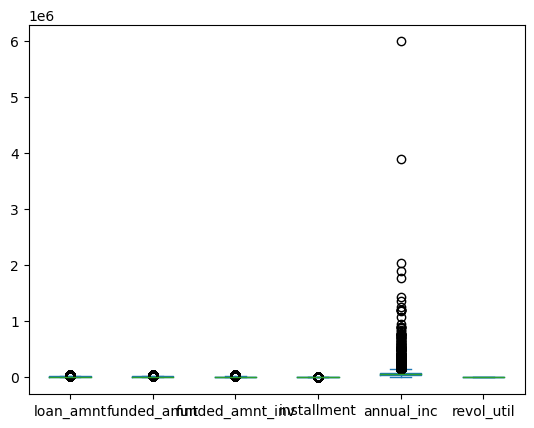

<Figure size 1000x2000 with 0 Axes>

In [218]:
loan[['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','revol_util']].plot(kind='box')
plt.figure(figsize=(10,20))
plt.show()

It is noted that significantly the outliers in annual income is having a huge imapct on rest of the metrics of data.

### Outlier Treatment

In [219]:
#outlier_numeric_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','open_acc','revol_util','total_acc']
outlier_numeric_cols = ['annual_inc']
Q1 = loan[outlier_numeric_cols].quantile(0.25)


In [220]:
Q1

annual_inc    40000.0
Name: 0.25, dtype: float64

In [221]:
Q3 = loan[outlier_numeric_cols].quantile(0.75)

In [222]:
Q3

annual_inc    82000.0
Name: 0.75, dtype: float64

In [223]:
IQR = Q3 - Q1


In [224]:
IQR

annual_inc    42000.0
dtype: float64

In [225]:
lower_boundry = Q1 - 1.5*IQR


In [226]:
lower_boundry


annual_inc   -23000.0
dtype: float64

In [227]:
higher_boundry = Q3 + 1.5*IQR


In [228]:
higher_boundry


annual_inc    145000.0
dtype: float64

In [229]:
loan[outlier_numeric_cols].isna().sum()


annual_inc    0
dtype: int64

In [230]:
loan_without_outliers = loan[~((loan[outlier_numeric_cols] < lower_boundry) | (loan[outlier_numeric_cols] > higher_boundry)).any(axis=1)]


In [231]:
loan_without_outliers.shape


(36815, 29)

In [232]:
loan = loan_without_outliers


In [233]:
loan.shape


(36815, 29)

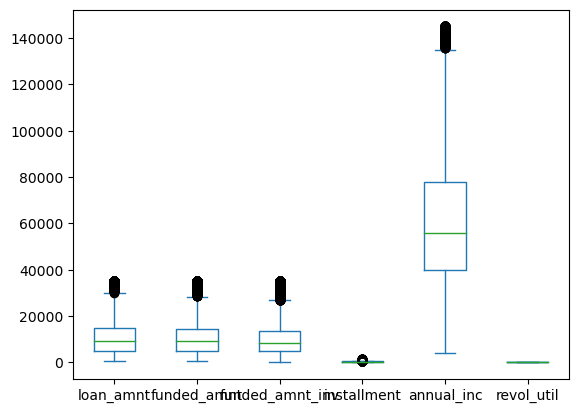

<Figure size 1000x2000 with 0 Axes>

In [234]:
loan[['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','revol_util']].plot(kind='box')
plt.figure(figsize=(10,20))
plt.show()

# Univariate Analysis

## Data distribution plots

In [235]:
def box_plot(cols):
    plt.figure(figsize=(3,3))
    sns.boxplot(loan[str(cols)])
# Adding and formatting title
    plt.title('Distribution of ' + str(cols), fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
# Labeling Axes
    plt.ylabel(str(cols), fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.show()

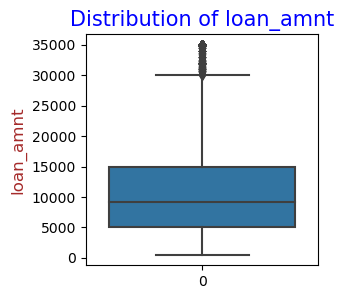

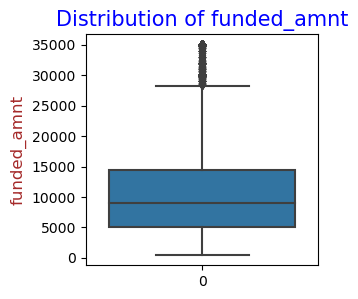

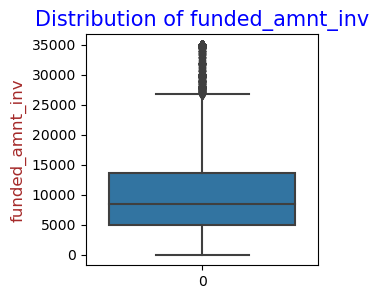

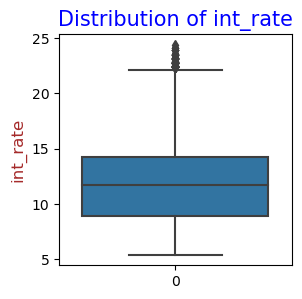

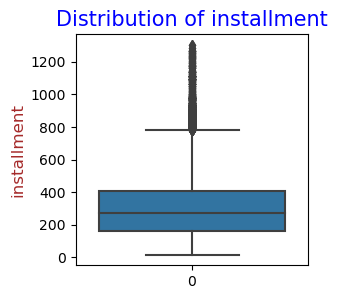

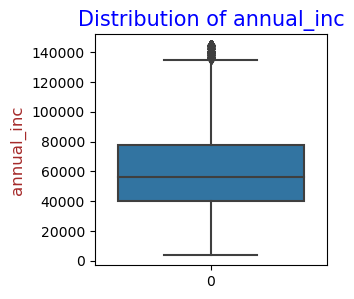

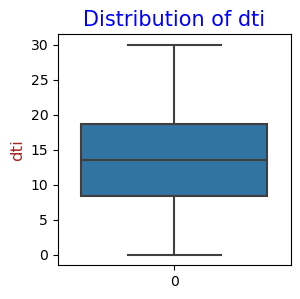

In [236]:
# plotting box plot for all numeric variable
for cols in numeric_cols1:
    box_plot(cols)

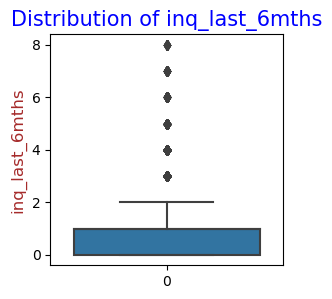

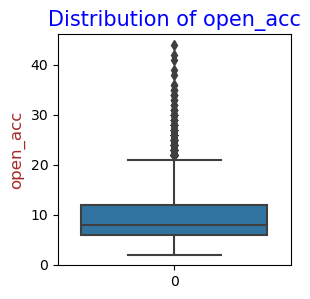

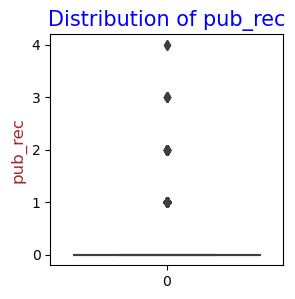

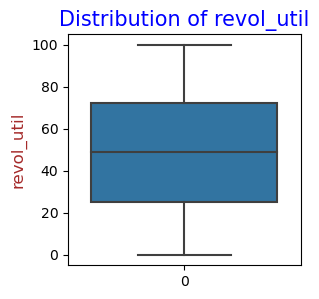

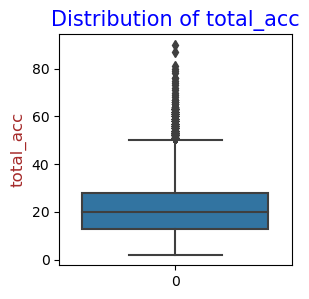

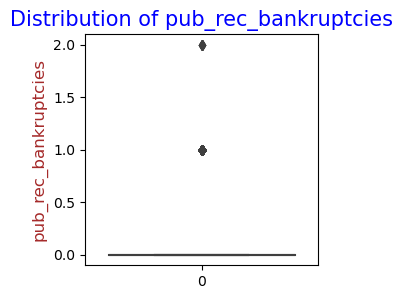

In [237]:
for cols in numeric_cols2:
    box_plot(cols)

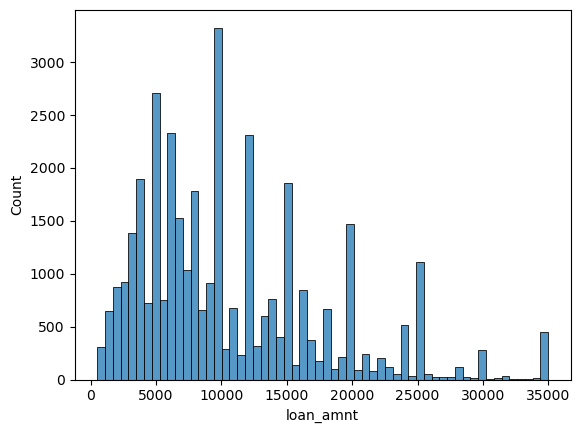

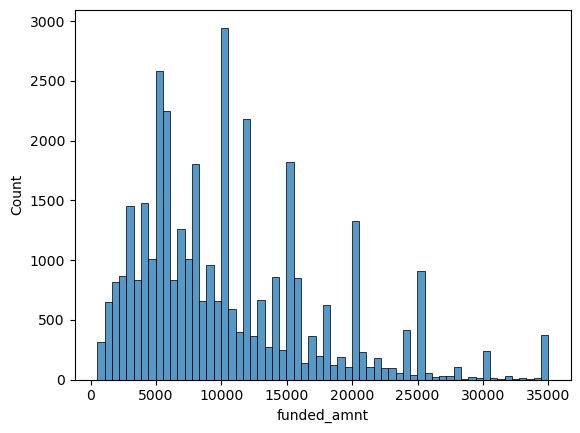

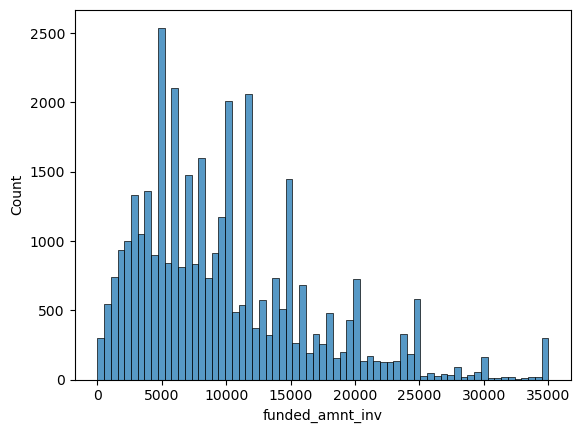

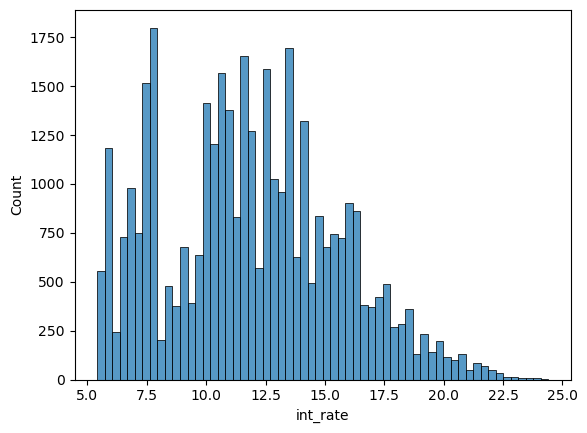

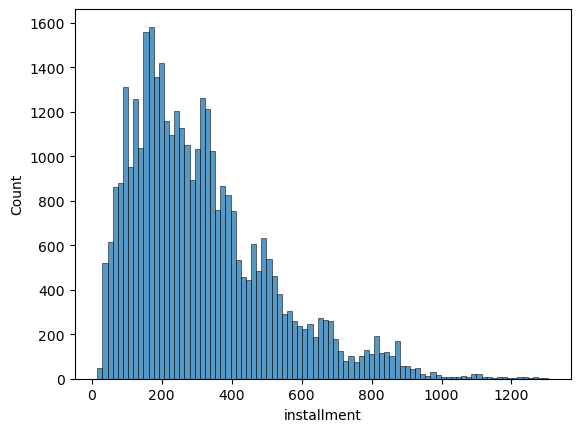

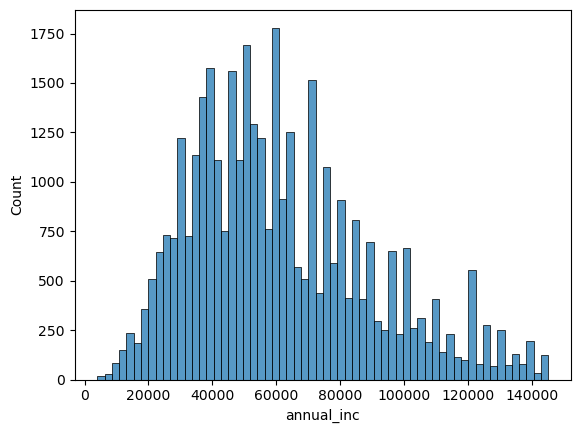

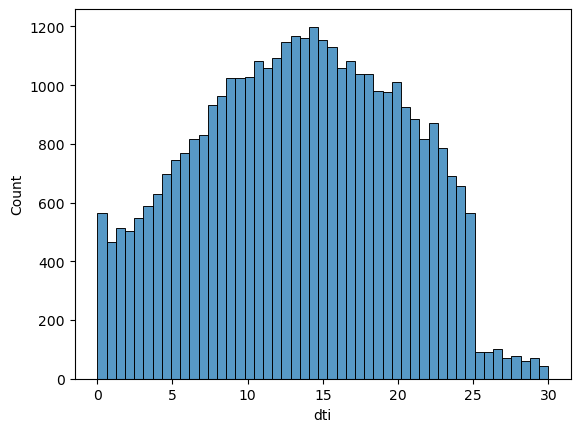

In [238]:
#plotting histogram for all numeric variables
for cols in numeric_cols1:
    sns.histplot(x=loan[str(cols)])
    plt.show()


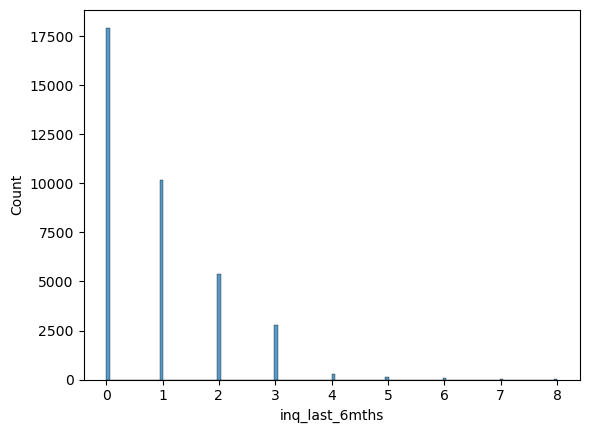

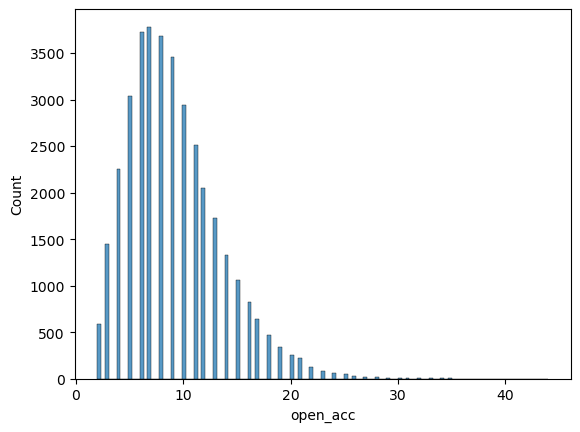

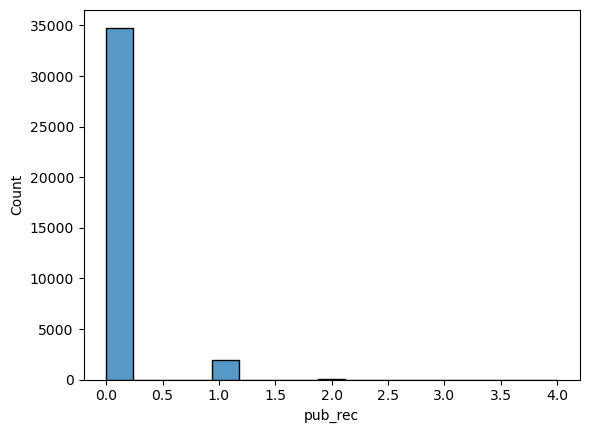

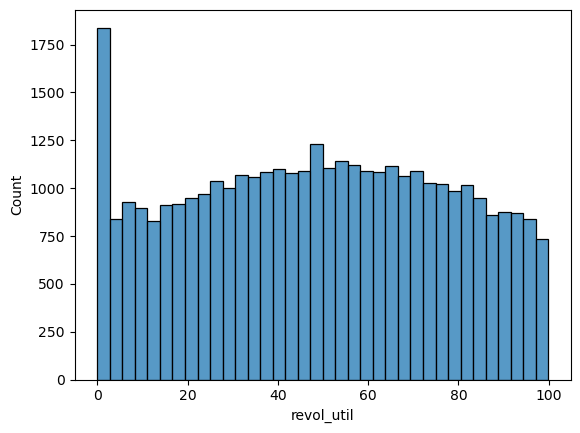

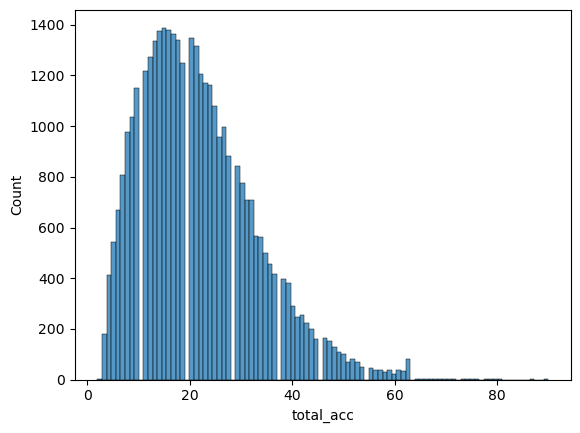

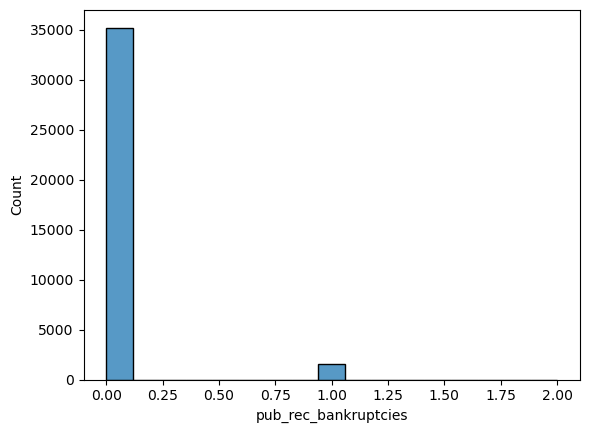

In [239]:
for cols in numeric_cols2:
    sns.histplot(x=loan[str(cols)])
    plt.show()


In [240]:
 
loan[numeric_cols1].describe()

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  36815.000000  36815.000000     36815.000000  36815.000000   
mean   10706.984925  10460.175200      9916.487115     11.889882   
std     7068.107909   6820.737715      6750.340900      3.668709   
min      500.000000    500.000000         0.000000      5.420000   
25%     5000.000000   5000.000000      4988.984523      8.940000   
50%     9250.000000   9000.000000      8400.000000     11.710000   
75%    15000.000000  14400.000000     13687.858570     14.270000   
max    35000.000000  35000.000000     35000.000000     24.400000   

        installment     annual_inc           dti  
count  36815.000000   36815.000000  36815.000000  
mean     312.593015   61218.193490     13.437614  
std      199.806808   28224.583784      6.660651  
min       15.690000    4000.000000      0.000000  
25%      163.305000   40000.000000      8.340000  
50%      271.140000   56000.000000     13.570000  
75%      409.700000   78000.000000     18.700000  
max     1305.190000  145000.000000     29.990000

In [241]:
# let us check  few percentile on annual income
print('80 percentile', loan['annual_inc'].quantile(0.8))
print('90 percentile', loan['annual_inc'].quantile(0.9))
print('95 percentile', loan['annual_inc'].quantile(0.95))
print('100 percentile', loan['annual_inc'].quantile(1))

80 percentile 84996.0
90 percentile 100833.59999999998
95 percentile 120000.0
100 percentile 145000.0


In [242]:
# let us check futher
print('98 percentile', loan['annual_inc'].quantile(0.98))
print('99 percentile', loan['annual_inc'].quantile(0.99))
print('100 percentile', loan['annual_inc'].quantile(1))

98 percentile 130000.0
99 percentile 138000.0
100 percentile 145000.0


In [243]:
loan.shape

(36815, 29)

### Observation from Numeric data distribution plots(box plot and histogram)
* Loan_amnt, funded_amnt & funded_amnt_inv are having almost similar plot, the range is 4000 to 15000 approx
* Most of the applicants/customers have interest rate between 10 to 16 approx. After 16 int rate, number is reducing 
* It is noticed that people prefer installment amount lesser than 400.
* We observe that dti has highest value of 15 approx otherwise it looks normally distributed.
* Most of the customers have annual income in range of 30000 to 80000


## Univariate Analysis of unordered categorical variables

In [244]:
ordered_categorical_cols = ['term','grade','sub_grade','emp_length','issue_year','issue_month']

unordered_categorical_cols = ['home_ownership','purpose','verification_status','loan_status']

In [245]:
# Function to visualize unordered categorical variable
def unordered_visualization(category,xlabel_name,plot_title):
    sns.countplot(x=loan[str(category)], edgecolor='red',color='green',order = loan[str(category)].value_counts().iloc[:].index )
    plt.xticks(rotation='vertical')
    plt.title(str(plot_title), fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'})
    plt.xlabel(str(xlabel_name), fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
    plt.ylabel('Count', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
    plt.show()
    return

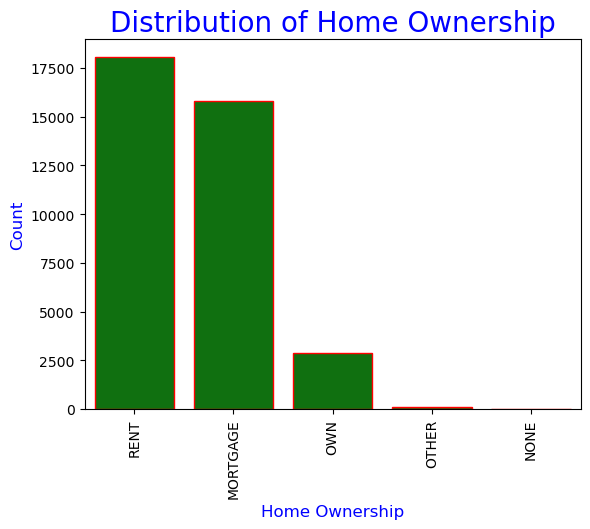

In [246]:
unordered_visualization('home_ownership','Home Ownership','Distribution of Home Ownership')

In [247]:
loan['home_ownership'].value_counts()/loan.shape[0]*100

home_ownership
RENT        49.064240
MORTGAGE    42.900991
OWN          7.774005
OTHER        0.252614
NONE         0.008149
Name: count, dtype: float64

### Insight
* Most of the customer (close to 92 %) are either on rent or having mortgaged home
* Very less applicants have their own home

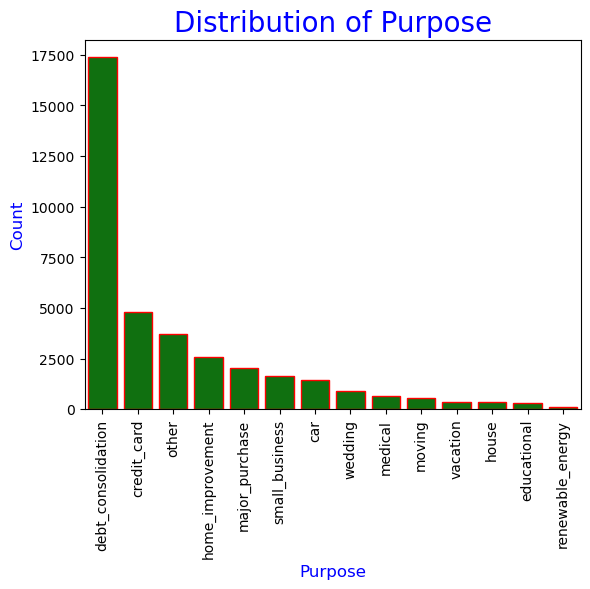

In [248]:
unordered_visualization('purpose','Purpose','Distribution of Purpose')

In [249]:
loan['purpose'].value_counts()/loan.shape[0]*100

purpose
debt_consolidation    47.203585
credit_card           13.046313
other                 10.082847
home_improvement       7.018878
major_purchase         5.579248
small_business         4.424827
car                    3.954910
wedding                2.433791
medical                1.743854
moving                 1.493956
vacation               0.991444
house                  0.918104
educational            0.850197
renewable_energy       0.258047
Name: count, dtype: float64

### Insight 
* Almost half of the applicants have applied loan with purpose of debt consolodation ie paying other debts they have
* Around 13 % of the applicants have applied for loan with purpose of paying credit card bills
* Conclusion is that more than 60% of the applicants/customers have applied for loan with purpose of paying some other existing debt or credit bills

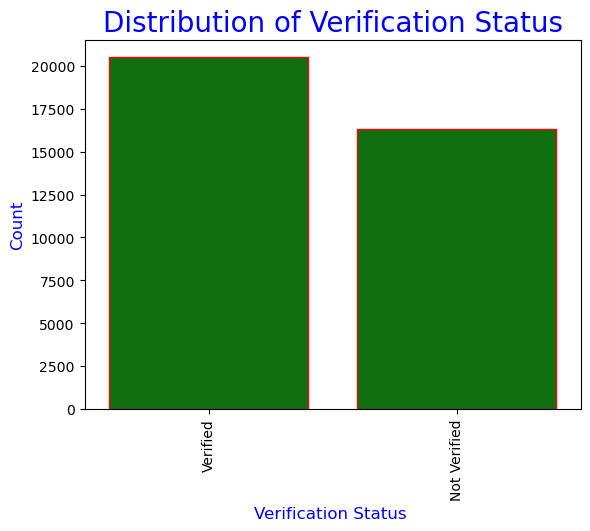

In [250]:
unordered_visualization('verification_status','Verification Status ','Distribution of Verification Status')

In [251]:
loan['verification_status'].value_counts()/loan.shape[0]*100

verification_status
Verified        55.670243
Not Verified    44.329757
Name: count, dtype: float64

### Insight 
* Every 2 out of 5 applicant's verification is not completed which is very alarming in the *lending business* 


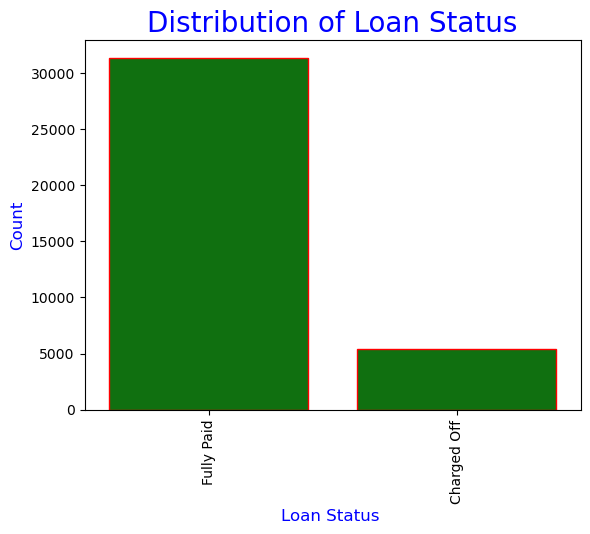

In [252]:
unordered_visualization('loan_status','Loan Status ','Distribution of Loan Status')

In [253]:
loan['loan_status'].value_counts()/loan.shape[0]*100

loan_status
Fully Paid     85.247861
Charged Off    14.752139
Name: count, dtype: float64

### Insight 
* Every 1 to 2 out of 10 applicants have defaulted on their loan availed

## Univariate Analysis of ordered categorical variables

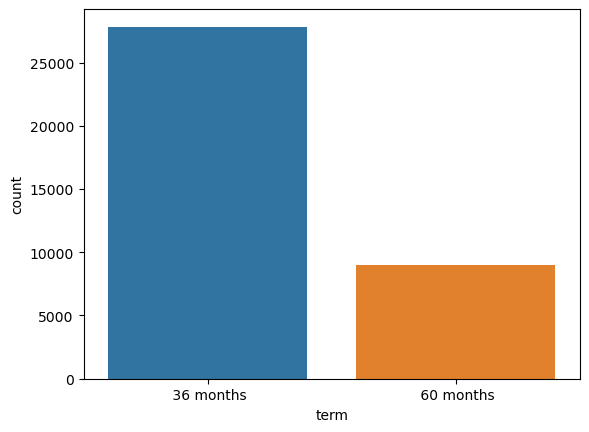

In [254]:
sns.countplot(x=loan['term'].sort_values())
plt.show()


In [255]:
loan['term'].value_counts()/loan.shape[0]*100

term
 36 months    75.613201
 60 months    24.386799
Name: count, dtype: float64

## Insight
* 3 out 4 applicants go for 3 year loan term ie low tenure

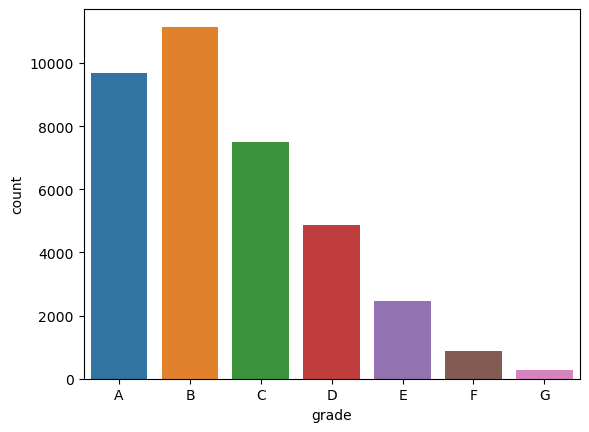

In [256]:
sns.countplot(x=loan['grade'].sort_values())
plt.show()

In [257]:
loan['grade'].value_counts()/loan.shape[0]*100

grade
B    30.292001
A    26.304495
C    20.388429
D    13.190276
E     6.682059
F     2.417493
G     0.725248
Name: count, dtype: float64

## Insight
* 3 out 4 applicants belong to grade A,B & C . 
* Highest applicants count belong to Grade B . 

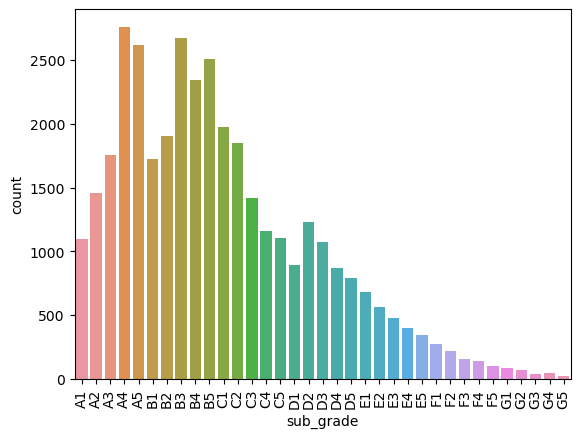

In [258]:
sns.countplot(x=loan['sub_grade'].sort_values())
plt.xticks(rotation='vertical')
plt.show()

## Insight 
* Highest applicants count belong to Sub Grade A4 and B3 . 

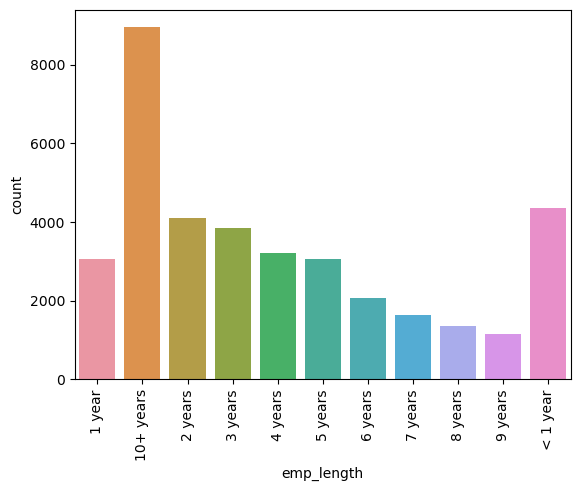

In [259]:
sns.countplot(x=loan['emp_length'].sort_values())
plt.xticks(rotation='vertical')
plt.show()

In [260]:
loan['emp_length'].value_counts()/loan.shape[0]*100

emp_length
10+ years    24.308027
< 1 year     11.815836
2 years      11.182942
3 years      10.433247
4 years       8.727421
5 years       8.300964
1 year        8.300964
6 years       5.652587
7 years       4.473720
8 years       3.661551
9 years       3.142741
Name: count, dtype: float64

## Insight 
* 25% of customers are having 10+ years of experience/employment length
* 33% of customers are having less than or equal to 3 years of experience 


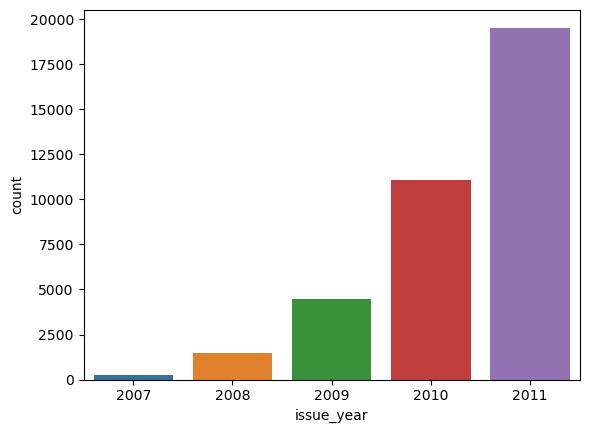

In [261]:
sns.countplot(x=loan['issue_year'].sort_values())
plt.show()

## Insight 
* With every passing year, no of customers increased
* Business is in bullish trend

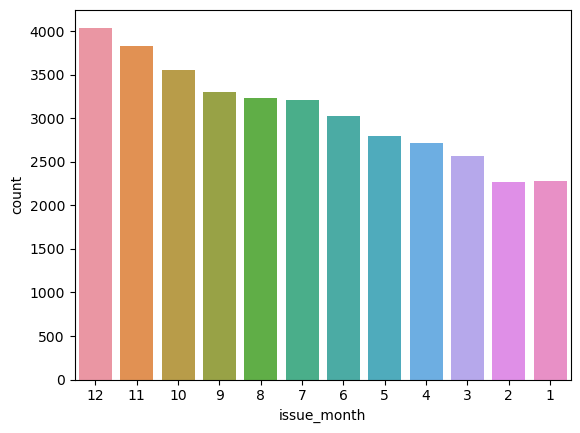

In [262]:
sns.countplot(x=loan['issue_month'])
plt.show()

### Asumption is that - By year end, Lending club is closing the targets. Hence, observation is that LC Representatives are issuing many loans in month of November and december to achieve targets.

# Segmented Univariate Analysis

In [263]:
loan[numeric_cols1].describe()

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  36815.000000  36815.000000     36815.000000  36815.000000   
mean   10706.984925  10460.175200      9916.487115     11.889882   
std     7068.107909   6820.737715      6750.340900      3.668709   
min      500.000000    500.000000         0.000000      5.420000   
25%     5000.000000   5000.000000      4988.984523      8.940000   
50%     9250.000000   9000.000000      8400.000000     11.710000   
75%    15000.000000  14400.000000     13687.858570     14.270000   
max    35000.000000  35000.000000     35000.000000     24.400000   

        installment     annual_inc           dti  
count  36815.000000   36815.000000  36815.000000  
mean     312.593015   61218.193490     13.437614  
std      199.806808   28224.583784      6.660651  
min       15.690000    4000.000000      0.000000  
25%      163.305000   40000.000000      8.340000  
50%      271.140000   56000.000000     13.570000  
75%      409.700000   78000.000000     18.700000  
max     1305.190000  145000.000000     29.990000

In [264]:
# Binning continous variable  to categorical variables 
# low = upto 25 percentile , mid = 25-50 percentile , high = 50-75 percentile and very high > 75 percentile
def binning_numric_variable(data_value,cols_name):
    if data_value  <= loan[str(cols_name)].quantile(0.25) :
        return('low-'+ cols_name)
    elif data_value  <= loan[str(cols_name)].quantile(0.75) :
        return('mid-'+ cols_name)
#    elif data_value  <= loan[str(cols_name)].quantile(0.75) :
#        return('high-'+ cols_name)
    else: 
        return('high-'+cols_name )

In [265]:
#loan['loan_amnt_category'] = loan['loan_amnt'].apply(lambda x : binning_numric_variable(x,'loan_amnt') )
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'],list(range(0,35001,7000)),labels = ['0-7K','7K-14K','14K-21K','21K-28K','28K+'])

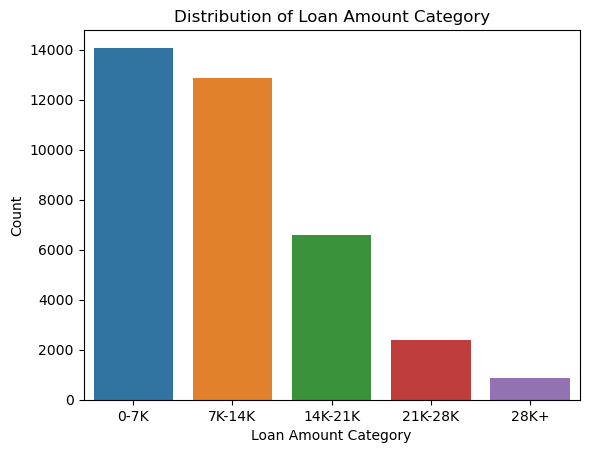

In [266]:
sns.countplot(x=loan['loan_amnt_bin'])
plt.xlabel('Loan Amount Category')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount Category')
plt.show()

In [267]:
loan['loan_amnt_bin'].value_counts()

loan_amnt_bin
0-7K       14082
7K-14K     12862
14K-21K     6594
21K-28K     2402
28K+         875
Name: count, dtype: int64

### Insight 
* Most of the people are applying low range loan amount 

In [268]:
#loan['int_rate_group'] = loan['int_rate'].apply(lambda x : binning_numric_variable(x,'int_rate') )
loan['int_rate_bin'] = pd.cut(loan['int_rate'],list(range(5,26,5)),labels = ['5-10%','10-15%','15-20%','20%+'])

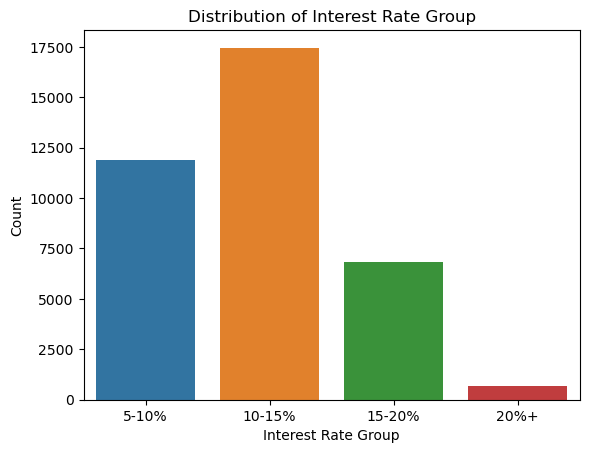

In [269]:
sns.countplot(x=loan['int_rate_bin'])
plt.xlabel('Interest Rate Group')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate Group')
plt.show()

In [270]:
loan['int_rate_bin'].value_counts()

int_rate_bin
10-15%    17457
5-10%     11867
15-20%     6810
20%+        681
Name: count, dtype: int64

### Insight 
* 1 out 2 people are taking loan with 10-15% Interest rate 

In [271]:
#loan['annual_inc_group'] = loan['annual_inc'].apply(lambda x : binning_numric_variable(x,'annual_inc') )
loan['annual_inc_bin'] = pd.cut(loan['annual_inc'],list(range(0,250001,50000)),labels = ['0-50K','50-100K','100-150K','150-200K','200K+'])

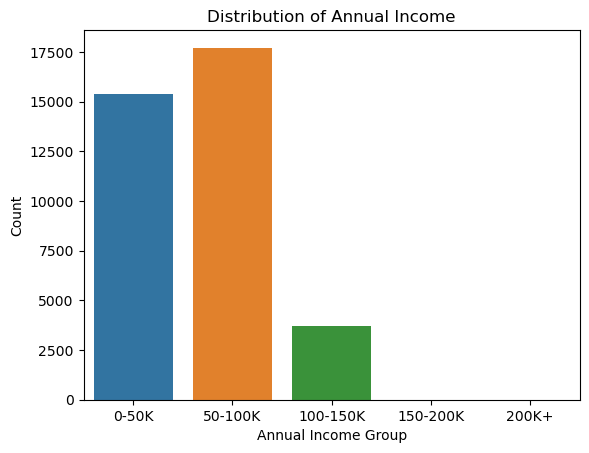

In [272]:
sns.countplot(x=loan['annual_inc_bin'])
plt.xlabel('Annual Income Group')
plt.ylabel('Count')
plt.title('Distribution of Annual Income')
plt.show()

In [273]:
loan['annual_inc_bin'].value_counts()

annual_inc_bin
50-100K     17707
0-50K       15389
100-150K     3719
150-200K        0
200K+           0
Name: count, dtype: int64

### Insight
* Most of the people are taking loan up to 100K

In [274]:
loan['installment_bin'] = pd.cut(loan['installment'],list(range(0,1001,200)),labels = ['0-200','200-400','400-600','600-800','800+'])

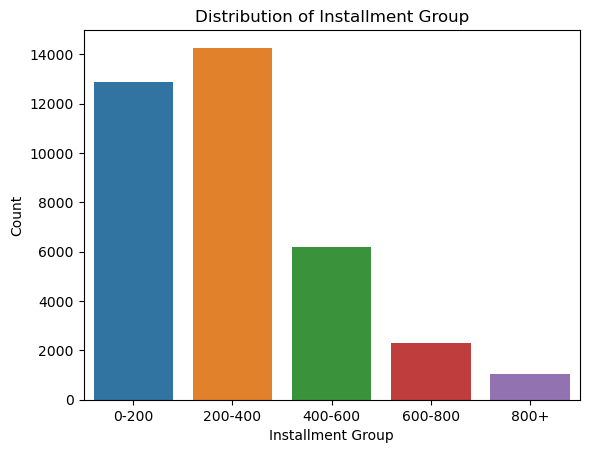

In [275]:
sns.countplot(x=loan['installment_bin'])
plt.xlabel('Installment Group')
plt.ylabel('Count')
plt.title('Distribution of Installment Group')
plt.show()

In [276]:
loan['installment_bin'].value_counts()

installment_bin
200-400    14261
0-200      12863
400-600     6169
600-800     2307
800+        1054
Name: count, dtype: int64

### Insight
* Most of the people are having installment upto 400

In [277]:
loan['open_acc_bin'] = pd.cut(loan['open_acc'],list(range(0,51,10)),labels = ['0-10','10-20','20-30','30-40','40+'])

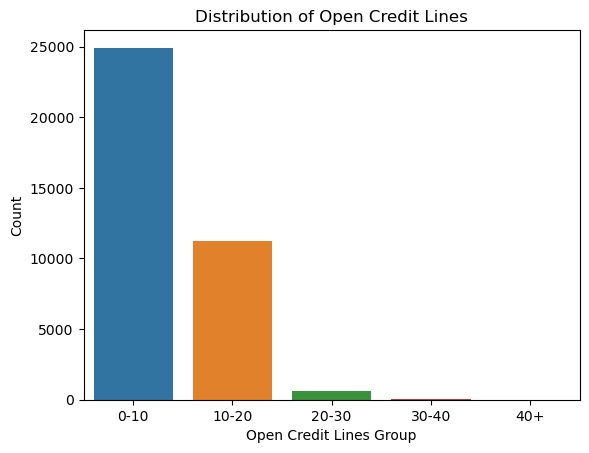

In [278]:
sns.countplot(x=loan['open_acc_bin'])
plt.xlabel('Open Credit Lines Group')
plt.ylabel('Count')
plt.title('Distribution of Open Credit Lines')
plt.show()

### Insight
* Most of the people are having 0-10 credit lines

In [279]:
loan['open_acc_bin'].value_counts()

open_acc_bin
0-10     24921
10-20    11234
20-30      633
30-40       24
40+          3
Name: count, dtype: int64

In [280]:
loan.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000           4975.0   36 months     10.65   
1  1077430       2500         2500           2500.0   60 months     15.27   
2  1077175       2400         2400           2400.0   36 months     15.96   
3  1076863      10000        10000          10000.0   36 months     13.49   
5  1075269       5000         5000           5000.0   36 months      7.90   

   installment grade sub_grade emp_length  ... total_acc  \
0       162.87     B        B2  10+ years  ...         9   
1        59.83     C        C4   < 1 year  ...         4   
2        84.33     C        C5  10+ years  ...        10   
3       339.31     C        C1  10+ years  ...        37   
5       156.46     A        A4    3 years  ...        12   

   pub_rec_bankruptcies is_default issue_year issue_month loan_amnt_bin  \
0                   0.0          0       2011          12          0-7K   
1                   0.0          1       2011          12          0-7K   
2                   0.0          0       2011          12          0-7K   
3                   0.0          0       2011          12        7K-14K   
5                   0.0          0       2011          12          0-7K   

  int_rate_bin  annual_inc_bin  installment_bin  open_acc_bin  
0       10-15%           0-50K            0-200          0-10  
1       15-20%           0-50K            0-200          0-10  
2       15-20%           0-50K            0-200          0-10  
3       10-15%           0-50K          200-400          0-10  
5        5-10%           0-50K            0-200          0-10  

[5 rows x 34 columns]

In [281]:
loan['annual_inc'].describe()

count     36815.000000
mean      61218.193490
std       28224.583784
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145000.000000
Name: annual_inc, dtype: float64

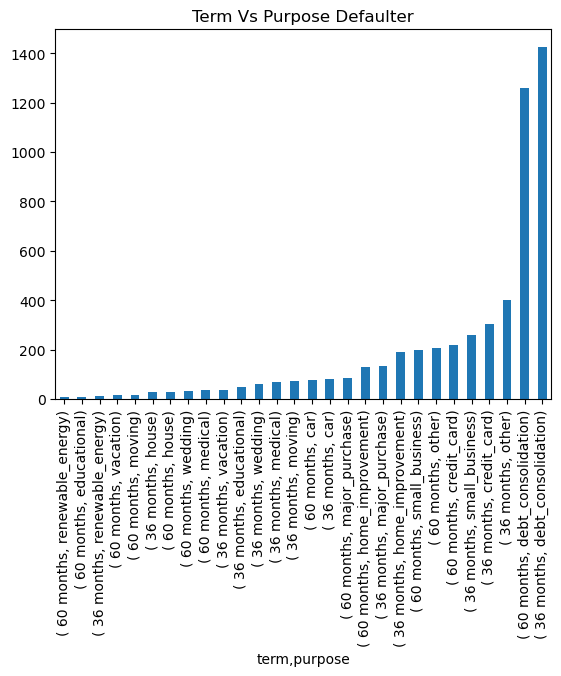

In [282]:
loan.groupby(by=['term','purpose'])['is_default'].sum().sort_values().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.title('Term Vs Purpose Defaulter')
plt.show()

### Insight 
* Customer applying with purpose of debt consolidation are highest defaulter
* Customer with 36 months loan tenure are mostly defaulting 



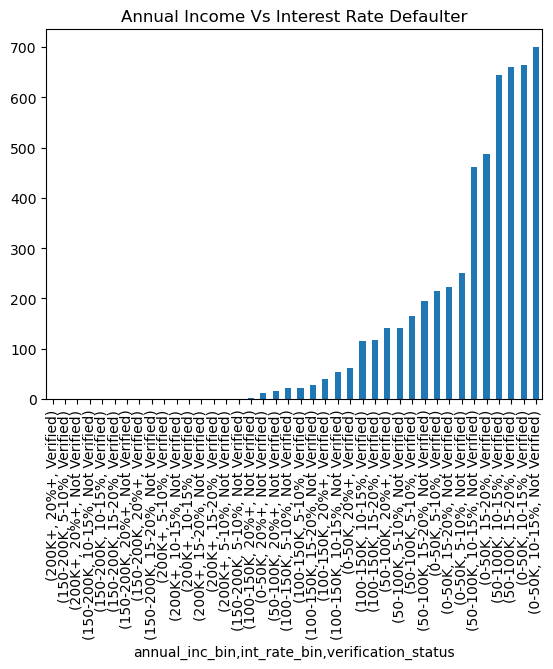

In [283]:
loan.groupby(by=['annual_inc_bin','int_rate_bin','verification_status'])['is_default'].sum().sort_values().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.title('Annual Income Vs Interest Rate Defaulter')
plt.show()

### Insight 
* People with 0-50K Income going for 10-15% interest rate, are not verified are defaulting most.

## Bivariavate analysis 

### Term Vs Loan Status

In [284]:
def do_bivariate(x_value,y_value,hue_value,sorting):
    plt.figure(figsize=[15,5])
    plt.subplot(121)
    if sorting == 'N':
        sns.barplot(x=x_value,y=y_value,hue=hue_value,data=loan)
    else:
        sns.barplot(x=x_value,y=y_value,hue=hue_value,data=loan,order=sorted(loan[str(x_value)].unique()))
    plt.xticks(rotation='vertical')
    plt.title('Bar Plot')
    plt.subplot(122)
    if sorting == 'N':
        sns.boxplot(x=x_value,y=y_value,hue=hue_value,data=loan)
    else:
        sns.boxplot(x=x_value,y=y_value,hue=hue_value,data=loan,order=sorted(loan[str(x_value)].unique()))
    plt.xticks(rotation='vertical')
    plt.title('Box Plot')
    plt.show()

def do_stacked_barplot(x_value,hue_value):
    plt.figure(figsize=[15,5])
    #plt.subplot(111)
    pd.crosstab(index=loan[str(x_value)],columns=loan[str(hue_value)],normalize=0).plot(kind='bar',stacked=True,color=['orange','blue'])
    plt.title('Stacked Bar Plot in Individual %')
    #plt.subplot(112)
    pd.crosstab(index=loan[str(x_value)],columns=loan[str(hue_value)],normalize=1).plot(kind='bar',stacked=True,color=['orange','blue'])
    plt.title('Stacked Bar Plot in Overall %')
    plt.show()


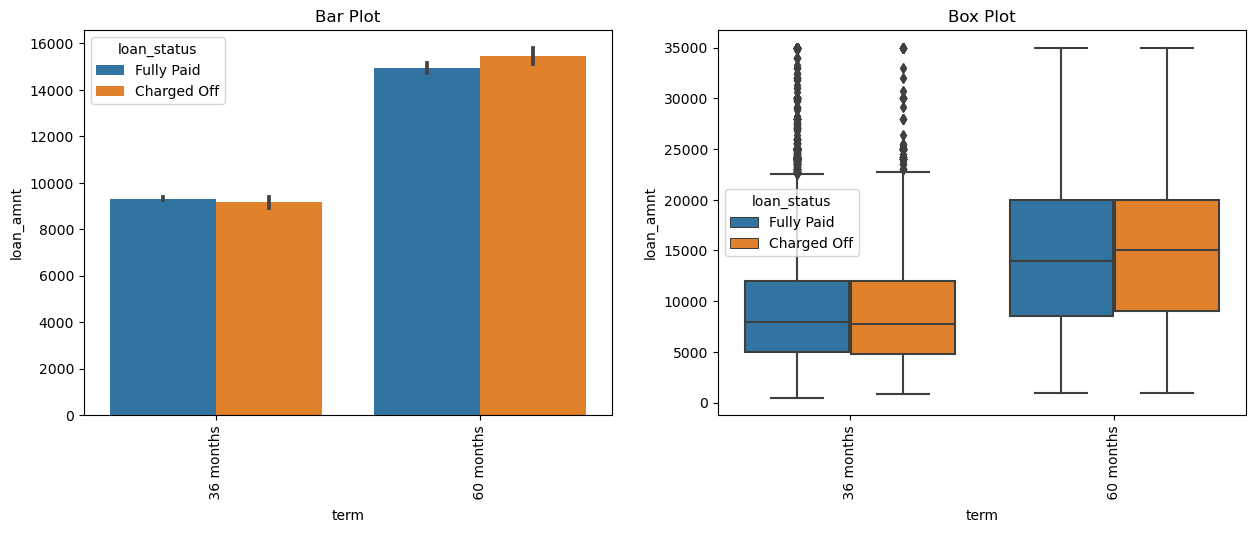

<Figure size 1500x500 with 0 Axes>

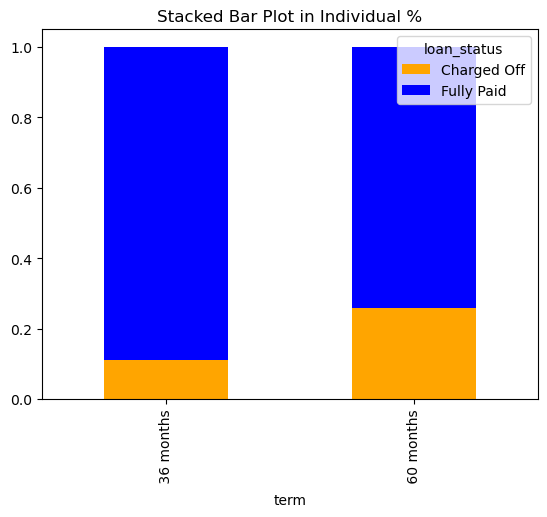

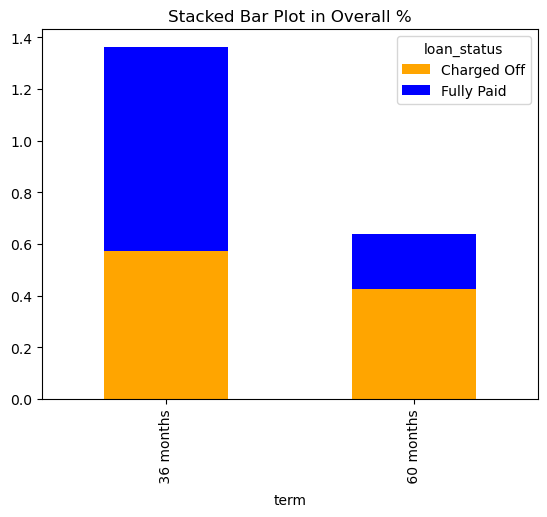

In [285]:
do_bivariate('term','loan_amnt','loan_status','N')
do_stacked_barplot('term','loan_status')

### Insight 
* Customers with 60 months term loan is more likely to default.

### Interest Rate Vs Loan Status

In [286]:
sns.barplot(x=x_value,y=y_value,hue=hue_value,data=loan)

NameError: name 'x_value' is not defined

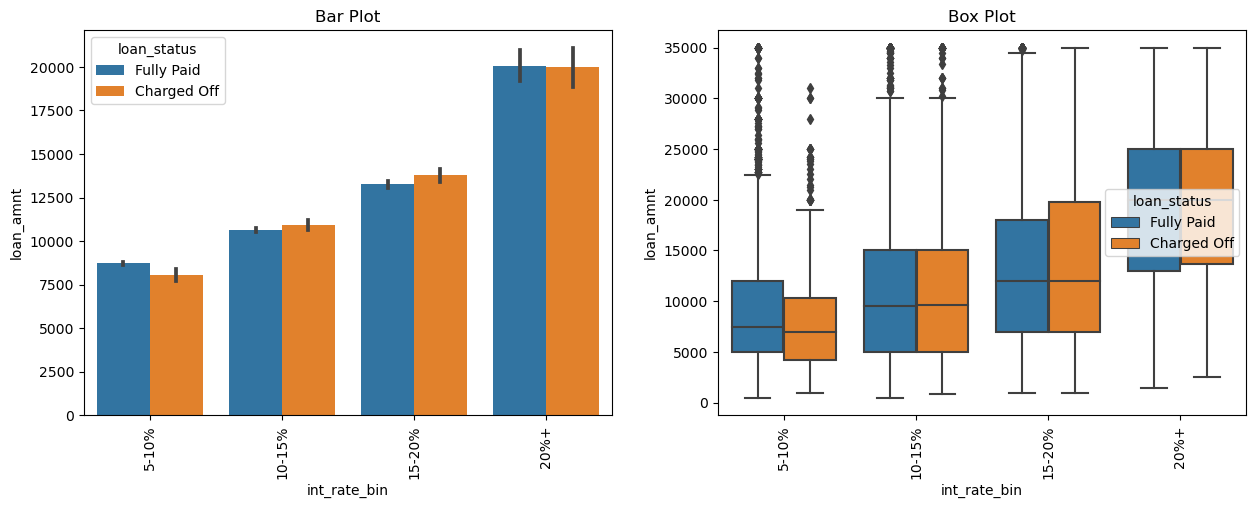

<Figure size 1500x500 with 0 Axes>

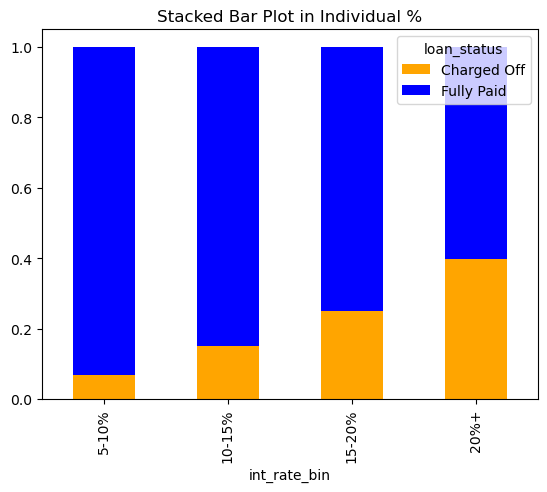

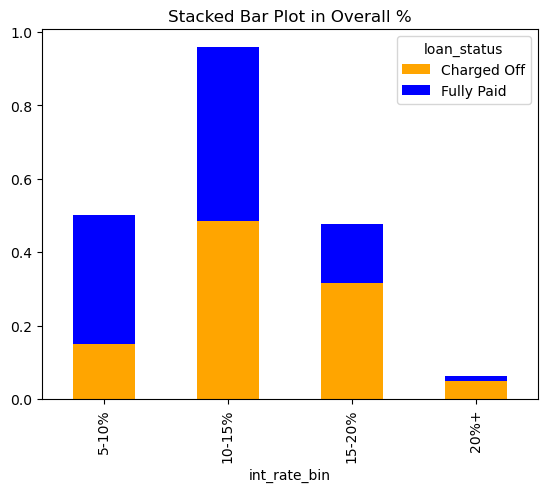

In [ ]:
do_bivariate('int_rate_bin','loan_amnt','loan_status','N')
do_stacked_barplot('int_rate_bin','loan_status')

### Insight 
* Customers with 20%+ Interest rate is more likely to default.

### Grade vs Loan Status

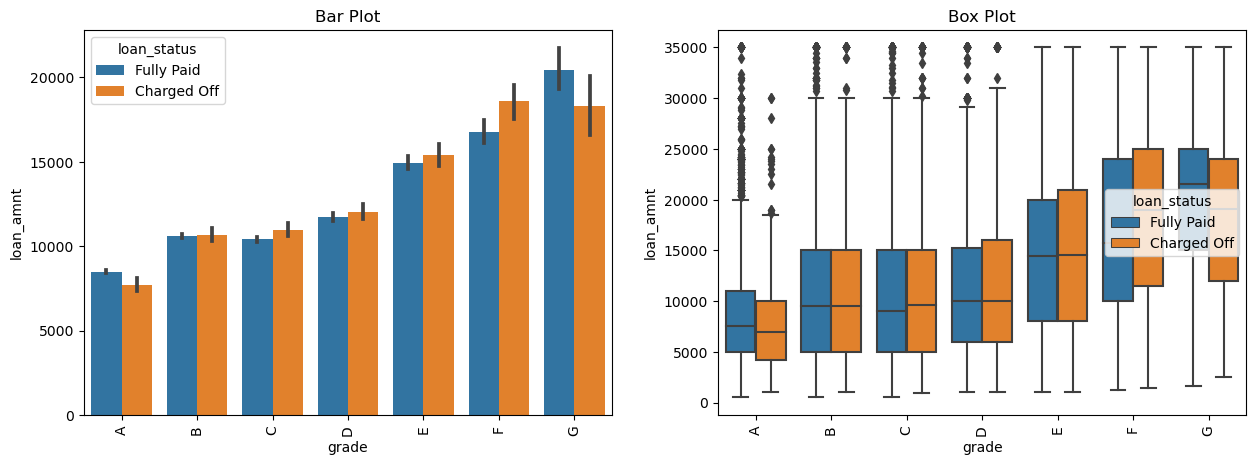

<Figure size 1500x500 with 0 Axes>

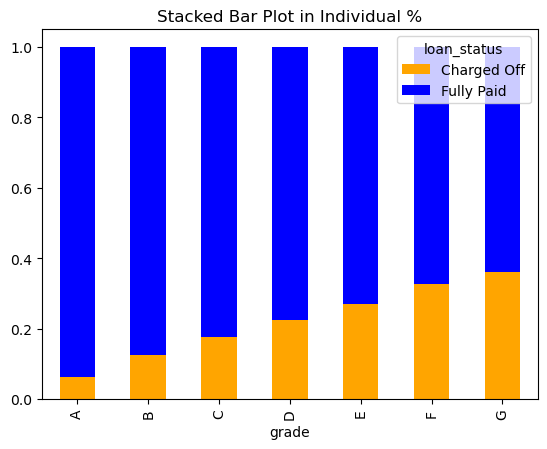

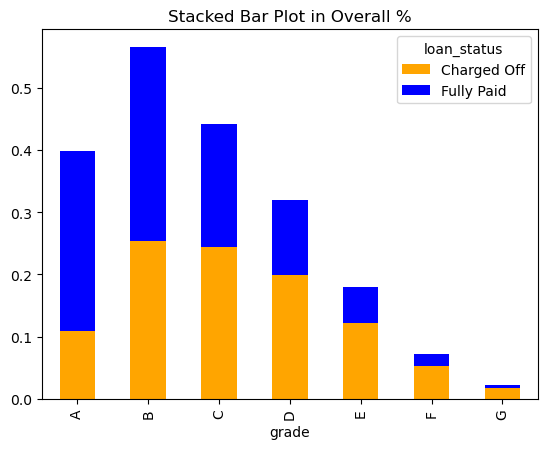

In [ ]:
do_bivariate('grade','loan_amnt','loan_status','Y')
do_stacked_barplot('grade','loan_status')

### Insight 
* Assumption is A is higher grade and G is lower grade
* Customers with lower grades are more likely to default.

### Sub Grade Vs Loan Status

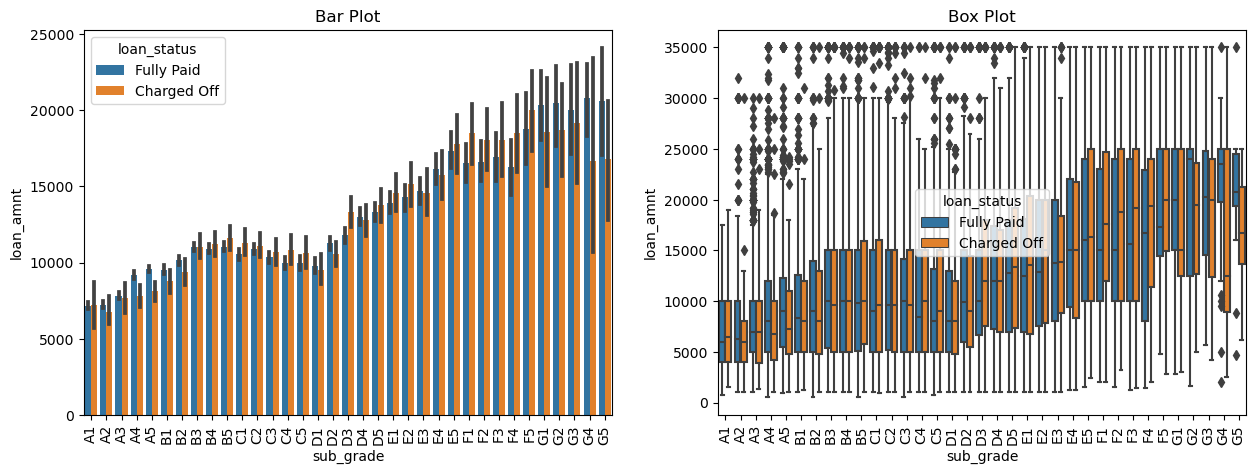

<Figure size 1500x500 with 0 Axes>

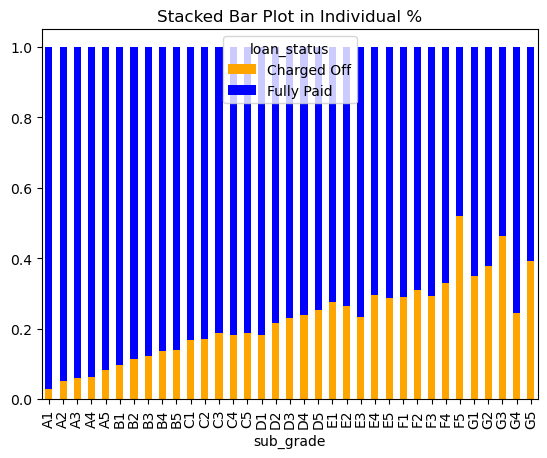

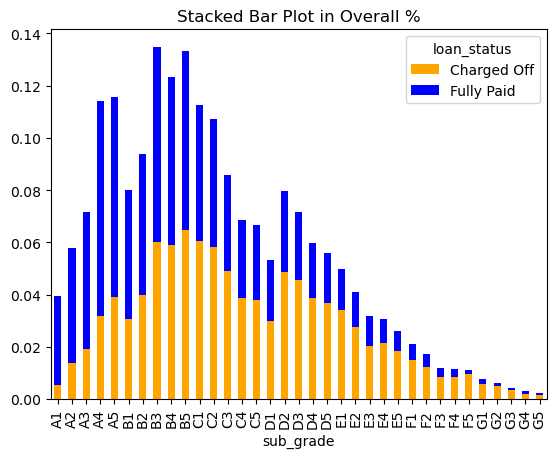

In [ ]:
do_bivariate('sub_grade','loan_amnt','loan_status','Y')
do_stacked_barplot('sub_grade','loan_status')


### Purpose Vs Loan Status

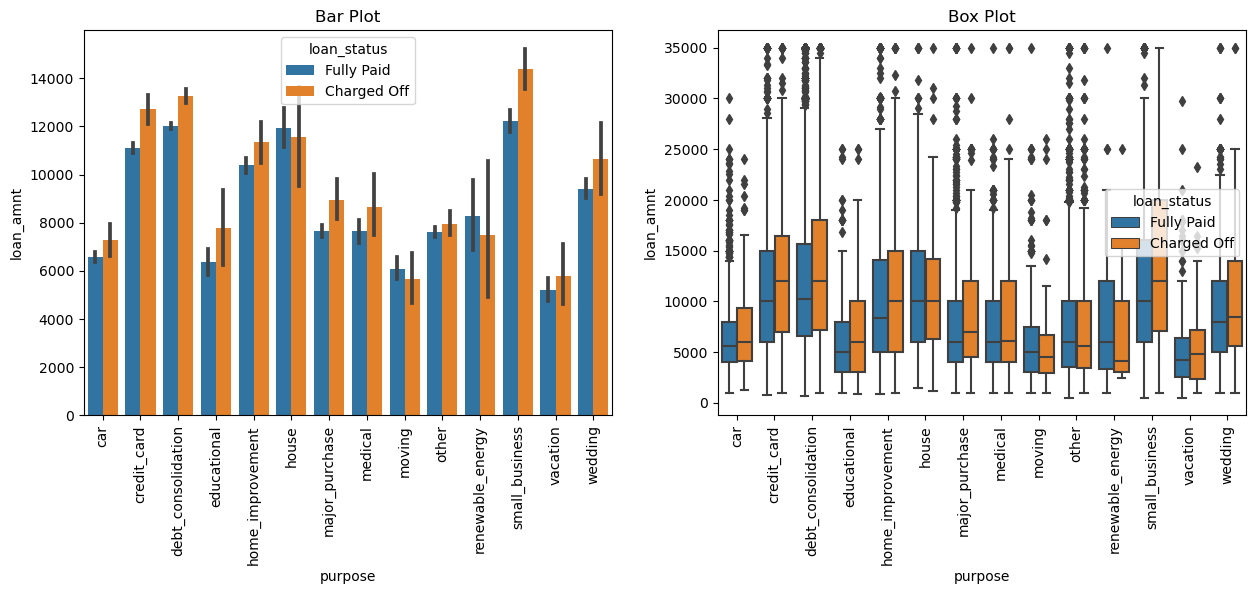

<Figure size 1500x500 with 0 Axes>

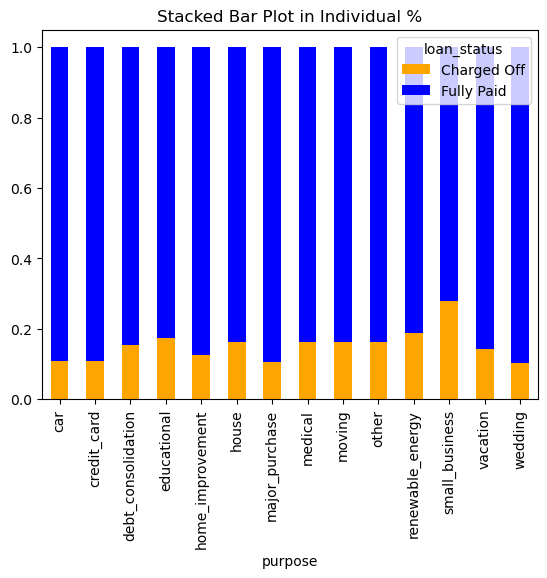

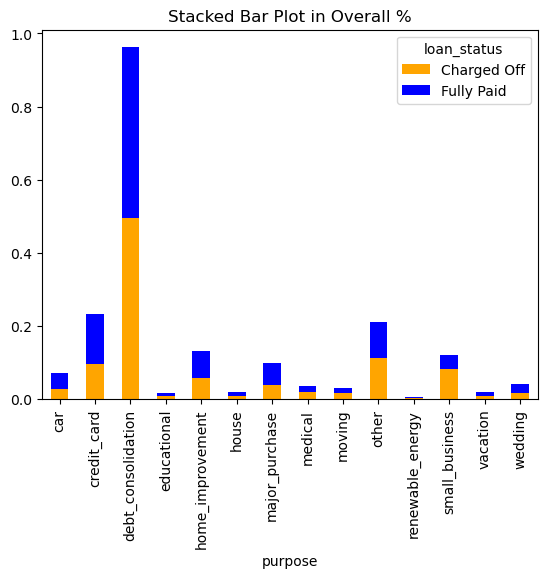

In [ ]:
do_bivariate('purpose','loan_amnt','loan_status','Y')
do_stacked_barplot('purpose','loan_status')


### Insight
* Customers with purpose of debt consolidation and small businesses are more likely to default

### Employment Length Vs Loan Status

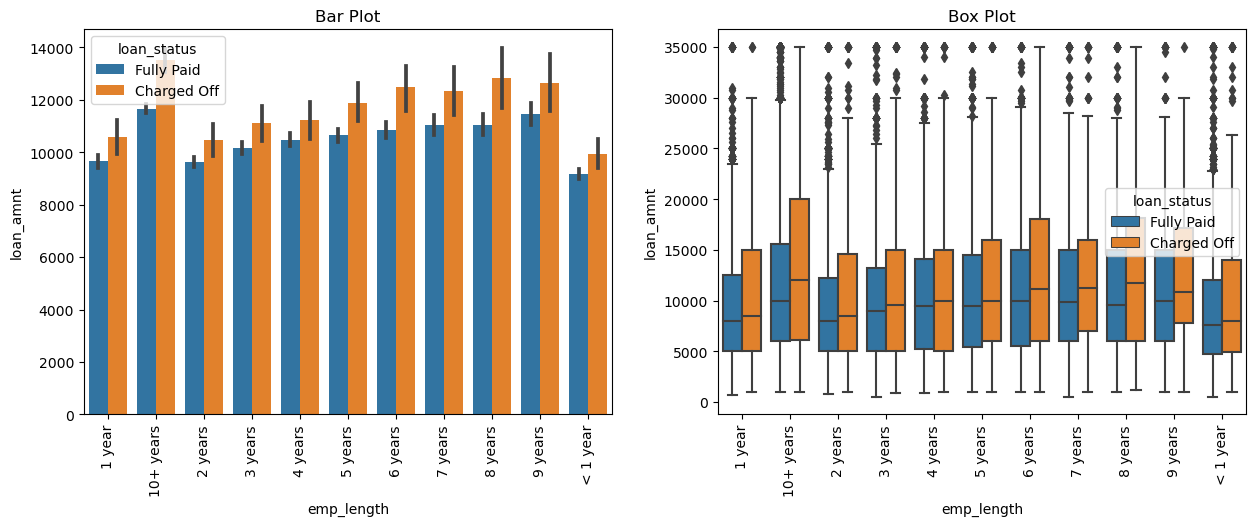

<Figure size 1500x500 with 0 Axes>

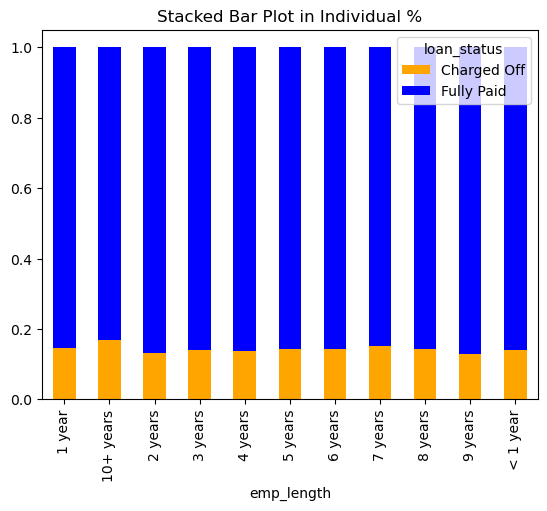

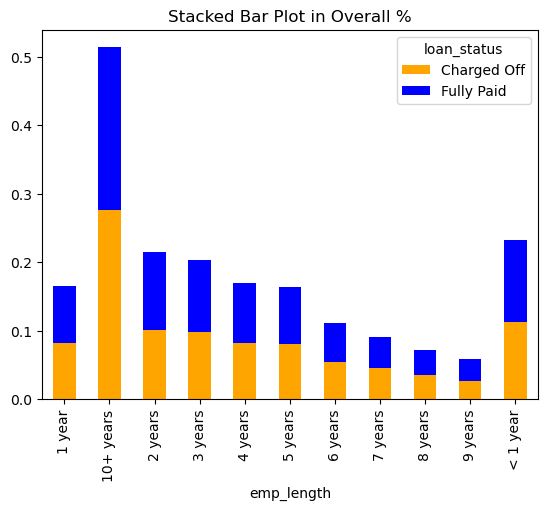

In [ ]:
do_bivariate('emp_length','loan_amnt','loan_status','Y')
do_stacked_barplot('emp_length','loan_status')

### Insight 
* Customers with 10+ years experience and <1 year  are more likely to default

### No of Open Credit Account vs Loan Status

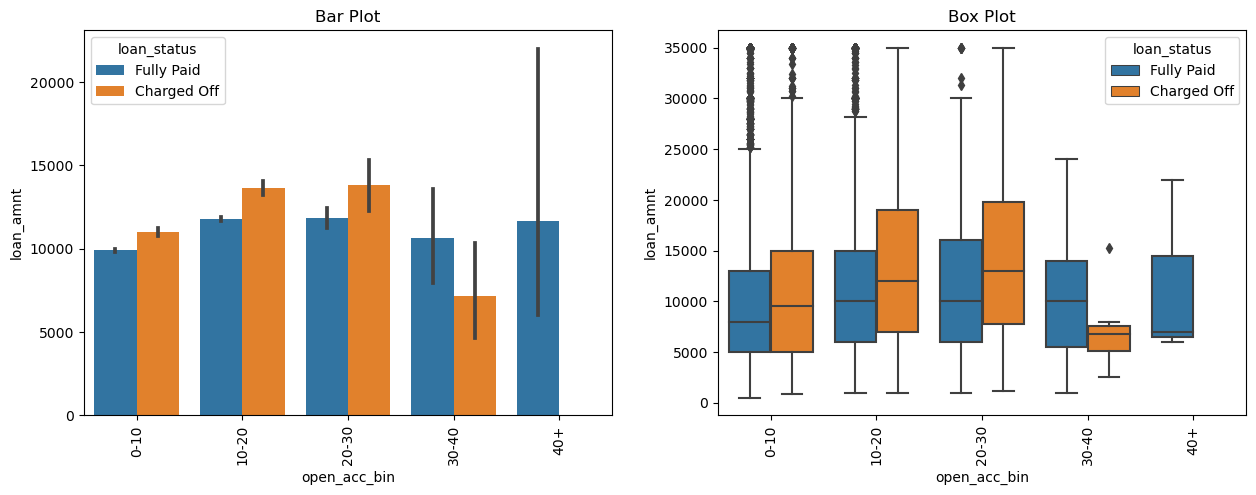

<Figure size 1500x500 with 0 Axes>

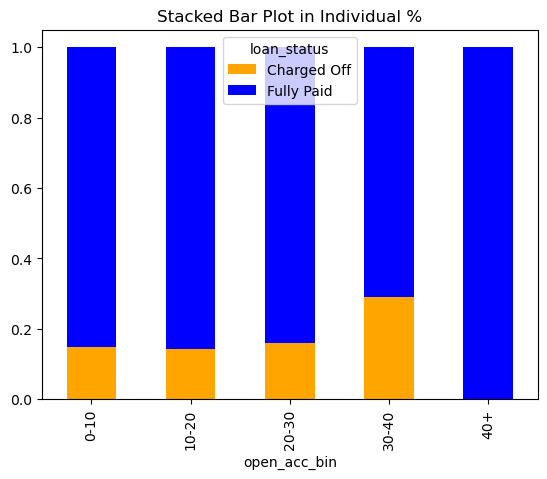

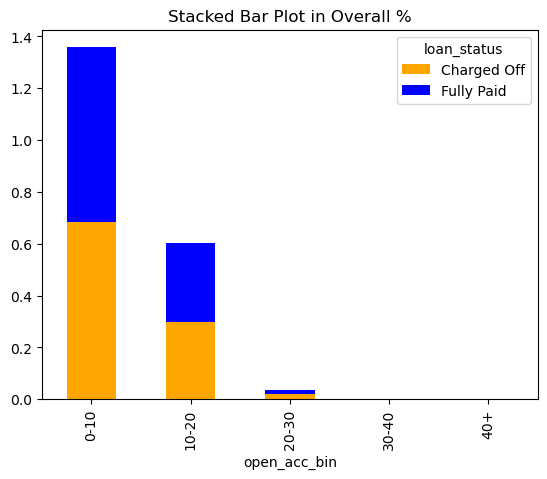

In [ ]:
do_bivariate('open_acc_bin','loan_amnt','loan_status','Y')
do_stacked_barplot('open_acc_bin','loan_status')

### Number of public record bankruptcies Vs Loan Status

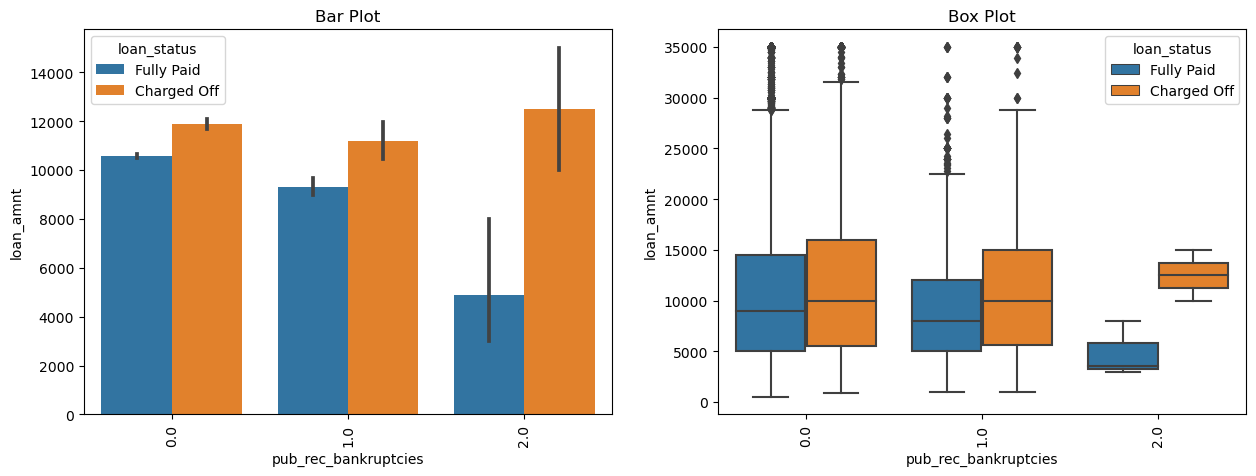

<Figure size 1500x500 with 0 Axes>

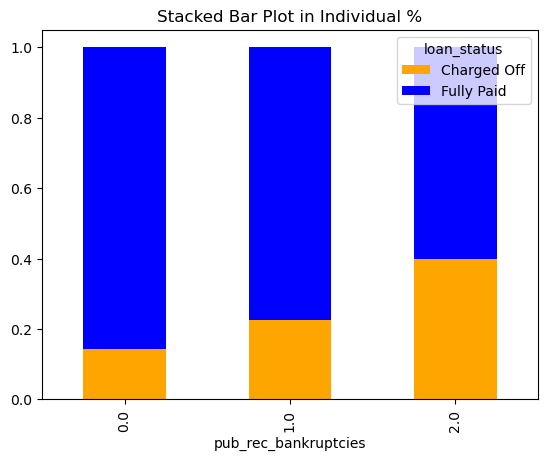

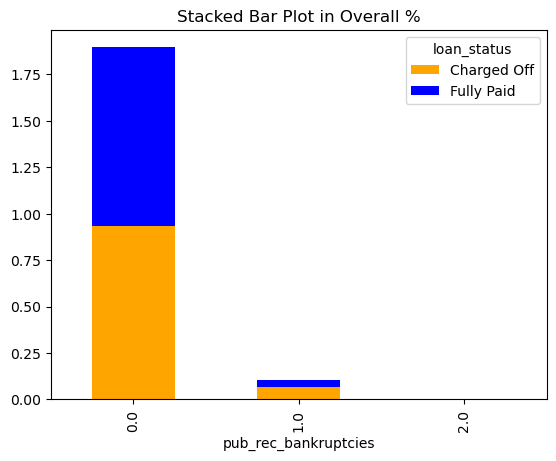

In [ ]:
do_bivariate('pub_rec_bankruptcies','loan_amnt','loan_status','Y')
do_stacked_barplot('pub_rec_bankruptcies','loan_status')

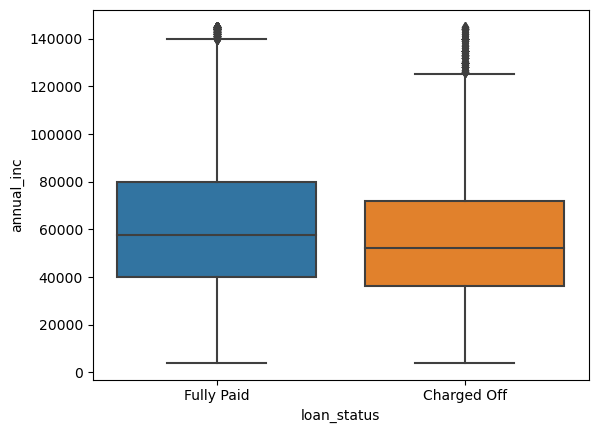

In [ ]:
sns.boxplot(x='loan_status',y='annual_inc',data=loan)
plt.show()

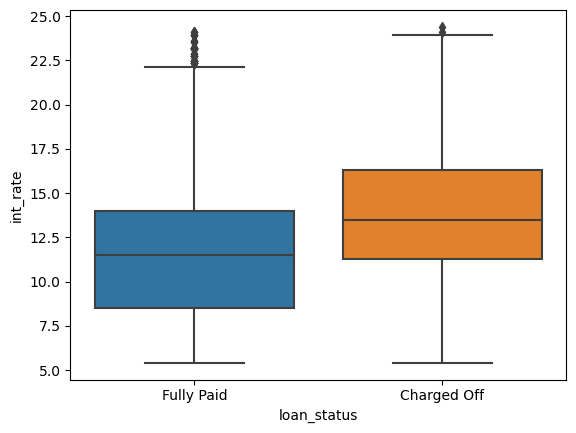

In [ ]:
sns.boxplot(x='loan_status',y='int_rate',data=loan)
plt.show()

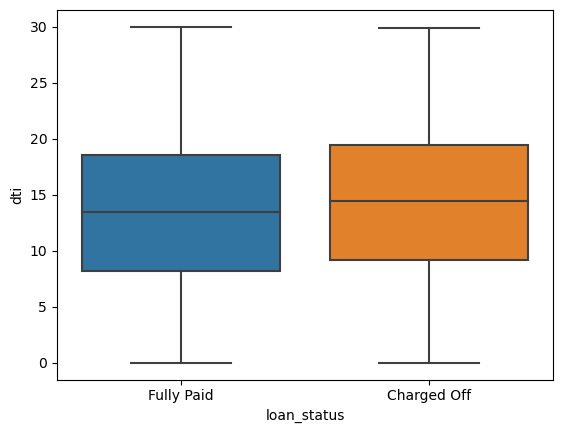

In [ ]:
sns.boxplot(x='loan_status',y='dti',data=loan)
plt.show()

In [ ]:
loan[loan['pub_rec_bankruptcies']==2.0]

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
14127  766151       3600         3600           3600.0   36 months     17.99   
18724  690178      15000        15000          15000.0   36 months     16.40   
23127  610693       8000         8000           8000.0   36 months     13.35   
23381  614596      10000        10000          10000.0   36 months     10.36   
31554  493743       3000         3000           3000.0   36 months     16.82   

       installment grade sub_grade emp_length  ... revol_util  total_acc  \
14127       130.14     E        E1  10+ years  ...       99.1         16   
18724       530.33     E        E1    6 years  ...       81.7         14   
23127       270.91     C        C4   < 1 year  ...       43.1         39   
23381       324.37     B        B5    7 years  ...       67.4         17   
31554       106.69     E        E2    9 years  ...       93.8         10   

      pub_rec_bankruptcies issue_year issue_month loan_amnt_bin int_rate_bin  \
14127                  2.0       2011           6          0-7K       15-20%   
18724                  2.0       2011           3       14K-21K       15-20%   
23127                  2.0       2010          11        7K-14K       10-15%   
23381                  2.0       2010          11        7K-14K       10-15%   
31554                  2.0       2010           3          0-7K       15-20%   

       annual_inc_bin  installment_bin  open_acc_bin  
14127         50-100K            0-200         10-20  
18724         50-100K          400-600          0-10  
23127           0-50K          200-400         10-20  
23381           0-50K          200-400         10-20  
31554           0-50K            0-200          0-10  

[5 rows x 33 columns]

In [ ]:
loan.open_acc

0         3
1         3
2         2
3        10
5         9
         ..
39711    10
39712    13
39713     6
39714    11
39716     7
Name: open_acc, Length: 36815, dtype: int64

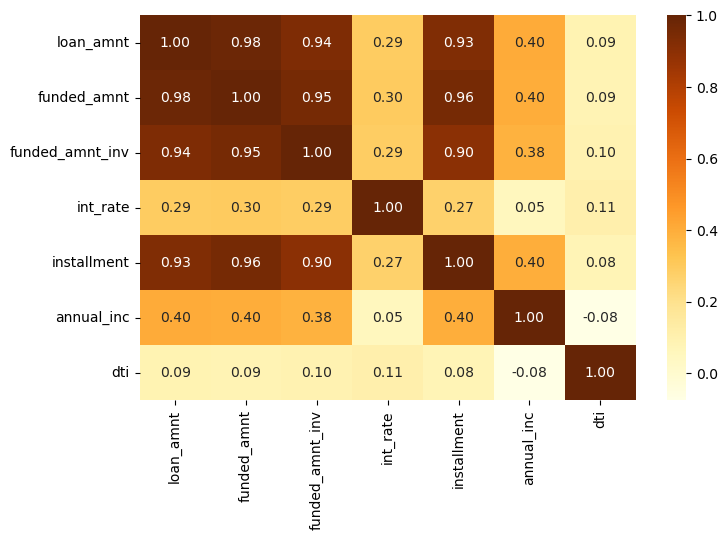

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(loan[numeric_cols1].corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

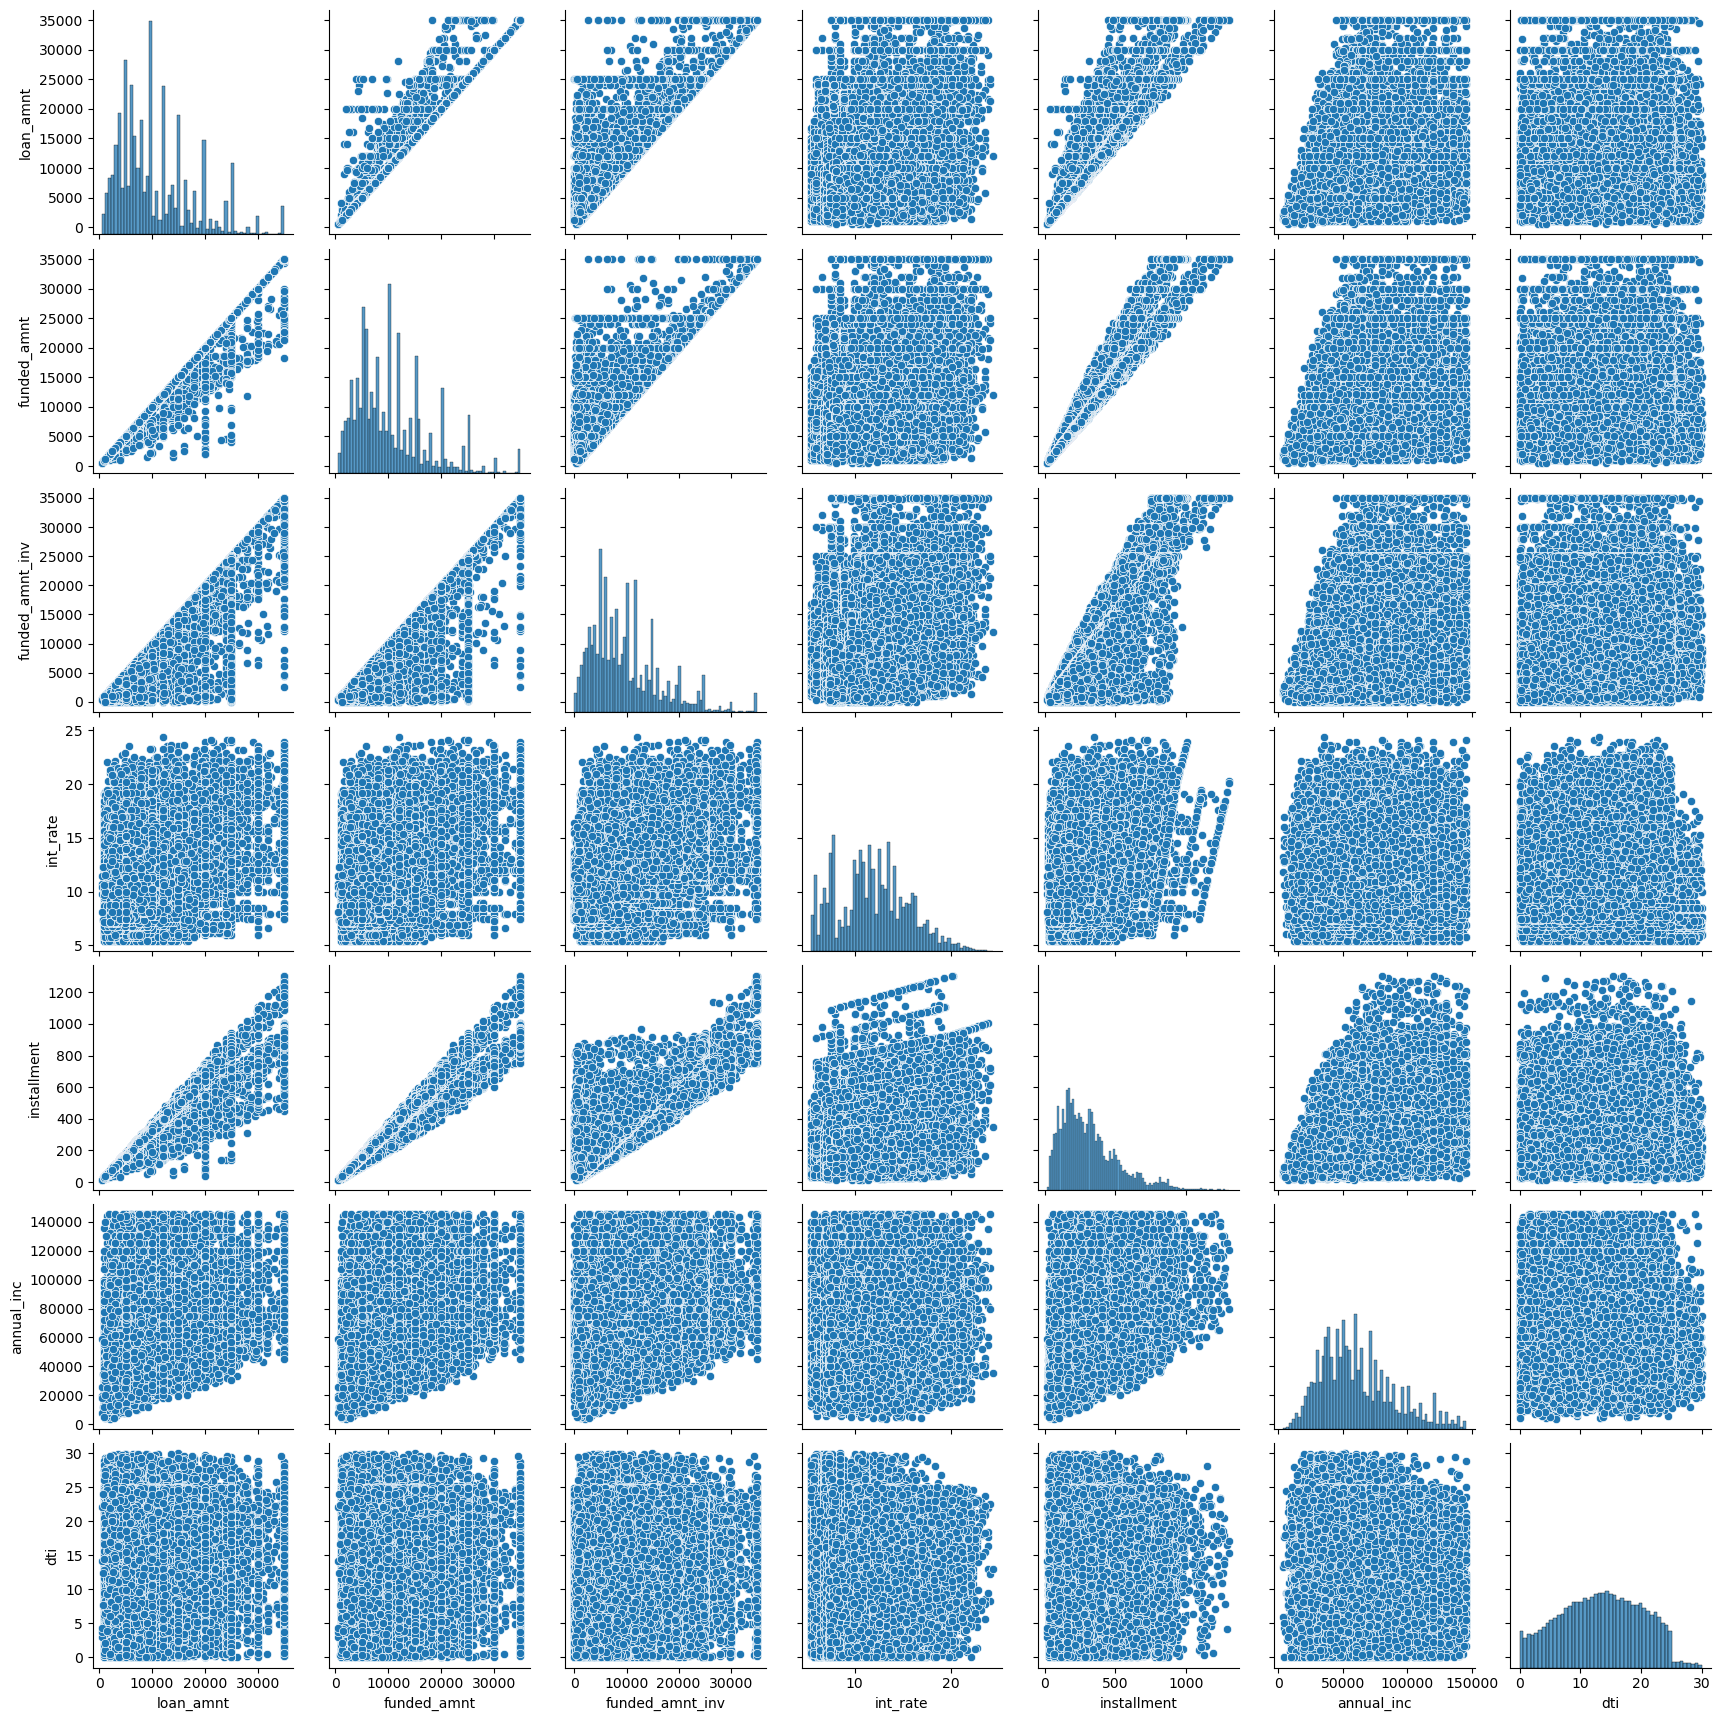

In [ ]:
sns.pairplot(loan[numeric_cols1])
plt.show()